In [1]:
# importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Lets first start with Aviation Industry


In [3]:
# S&P500
snp=pd.read_csv("S&P500.csv",index_col="Date")

In [4]:
# American Airline Group
AAL=pd.read_csv("AAL.csv",index_col="Date")
AAL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
01-10-2010,9.29,9.39,9.21,9.29,8.758067,3603800
04-10-2010,9.24,9.48,9.05,9.12,8.597802,3856800
05-10-2010,9.27,9.35,9.15,9.23,8.701504,3896600
06-10-2010,9.27,9.40,9.15,9.23,8.701504,3230200
07-10-2010,9.30,9.31,9.07,9.24,8.710930,3877700
...,...,...,...,...,...,...
24-09-2020,11.74,12.00,11.22,11.77,11.770000,49163200
25-09-2020,11.76,12.31,11.71,12.29,12.290000,43764000
28-09-2020,12.74,13.15,12.49,12.76,12.760000,63558200


In [5]:
# ALaska Air group
ALK=pd.read_csv("ALK.csv",index_col='Date')
ALK.isna().sum()

Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [6]:
ALK.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
28-09-2020,37.590000,38.259998,36.740002,37.540001,37.540001,2922800.0
29-09-2020,37.400002,37.419998,36.279999,36.669998,36.669998,1743500.0
30-09-2020,37.590000,38.270000,36.480000,36.630001,36.630001,1921600.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ALK=ALK.dropna()

In [8]:
# Hawain Holding Inc
HA=pd.read_csv("HA.csv",index_col='Date')
HA=HA.dropna()

In [9]:
aviation=pd.concat([AAL["Close"],ALK["Close"],HA['Close']],axis=1,)
aviation.columns=["AAL","ALK","HA"]
aviation

,AAL,ALK,HA
Date,,,
01-10-2010,9.29,12.447500,5.96
04-10-2010,9.12,12.142500,5.75
05-10-2010,9.23,12.215000,5.85
06-10-2010,9.23,12.187500,5.97
07-10-2010,9.24,11.625000,6.15
...,...,...,...
24-09-2020,11.77,35.700001,12.40
25-09-2020,12.29,36.700001,12.80
28-09-2020,12.76,37.540001,13.38


<Axes: xlabel='Date'>

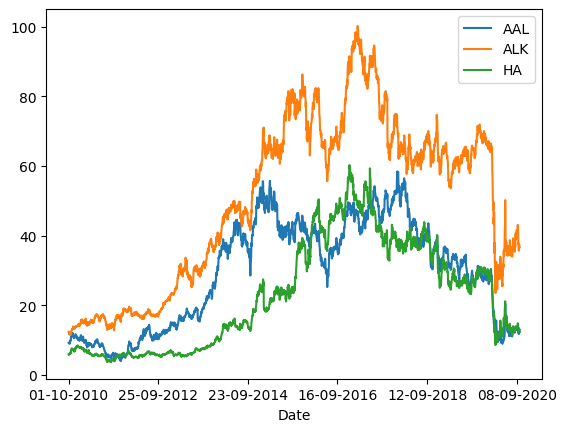

In [10]:
aviation.plot()

In [11]:
aviation_returns=aviation.pct_change()
aviation_returns=aviation_returns.dropna()
aviation_returns

,AAL,ALK,HA
Date,,,
04-10-2010,-0.018299,-0.024503,-0.035235
05-10-2010,0.012061,0.005971,0.017391
06-10-2010,0.000000,-0.002251,0.020513
07-10-2010,0.001083,-0.046154,0.030151
08-10-2010,-0.018398,0.036344,0.000000
...,...,...,...
24-09-2020,-0.013412,-0.031470,-0.032006
25-09-2020,0.044180,0.028011,0.032258
28-09-2020,0.038242,0.022888,0.045313


<Axes: xlabel='Date'>

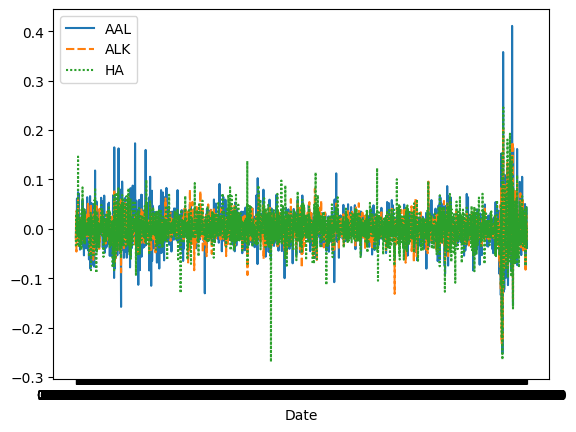

In [12]:
sns.lineplot(aviation_returns)

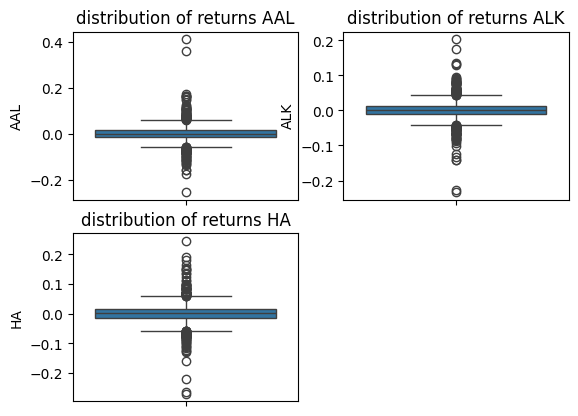

In [13]:
plt.figure()
for i,col in enumerate(aviation_returns.columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(aviation_returns[col])
    plt.title("distribution of returns "+col)

In [14]:
daily_returns_mean=aviation_returns.mean()
daily_returns_mean

AAL    0.000637
ALK    0.000709
HA     0.000765
dtype: float64

In [15]:
aviation_variations=aviation_returns.std()
aviation_variations

AAL    0.032726
ALK    0.023562
HA     0.030147
dtype: float64

In [16]:
aviation_summary=aviation_returns.describe()

In [17]:
aviation_summary.loc['skew']=aviation_returns.skew()

In [18]:
aviation_summary.loc['kurt']=aviation_returns.kurt()

In [19]:
pd.set_option('display.float_format', '{:,.6f}'.format)

In [20]:
aviation_summary.loc["cummulative_returns"]=(1+aviation_returns).cumprod().iloc[-1]

In [21]:
# Assuming that the risk free rate is zero
aviation_summary.loc['sharpe_ratio']=np.sqrt(252)*aviation_summary.loc['mean']/aviation_summary.loc['std']

In [22]:
aviation_summary

,AAL,ALK,HA
count,"2,516.000000","2,516.000000","2,516.000000"
mean,0.000637,0.000709,0.000765
std,0.032726,0.023562,0.030147
min,-0.252246,-0.232385,-0.269722
25%,-0.014116,-0.010126,-0.013826
50%,0.000216,0.000788,0.000451
75%,0.015593,0.011655,0.015317
max,0.410970,0.203079,0.245837
skew,1.261197,-0.397897,-0.173215
kurt,19.727388,14.243136,11.258744


In [23]:
annualised_returns=daily_returns_mean*252
annualised_returns

AAL   0.160489
ALK   0.178792
HA    0.192824
dtype: float64

In [24]:
annuakised_risk=np.sqrt(252)*aviation_summary.loc["std"]
annuakised_risk

AAL   0.519504
ALK   0.374043
HA    0.478573
Name: std, dtype: float64

In [25]:
aviation_summary.loc['annualised_returns']=annualised_returns
aviation_summary.loc["annualised_risk"]=annuakised_risk

In [26]:
aviation_summary

,AAL,ALK,HA
count,"2,516.000000","2,516.000000","2,516.000000"
mean,0.000637,0.000709,0.000765
std,0.032726,0.023562,0.030147
min,-0.252246,-0.232385,-0.269722
25%,-0.014116,-0.010126,-0.013826
50%,0.000216,0.000788,0.000451
75%,0.015593,0.011655,0.015317
max,0.410970,0.203079,0.245837
skew,1.261197,-0.397897,-0.173215
kurt,19.727388,14.243136,11.258744


| Metric       | Meaning                                 |
|--------------|------------------------------------------|
| `mean()`     | Average return (expected return)         |
| `std()`      | Volatility (risk)                        |
| `min()` / `max()` | Best and worst returns              |
| `median()`   | Midpoint return                          |
| `skew()`     | Symmetry of return distribution          |
| `kurt()`     | Tailedness (extreme moves)               |
| `cumprod()`   | Cumulative return                        |


In [28]:
#Healtcare industry

In [29]:
JNJ=pd.read_csv("JNJ.csv",index_col="Date")
JNJ=JNJ.dropna()

In [30]:
MRK=pd.read_csv("MRK.csv",index_col="Date")
MRK=MRK.dropna()

In [31]:
# Bausch Health Companies inc
BHC=pd.read_csv("BHC.csv",index_col="Date")
BHC=BHC.dropna()
BHC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
01-10-2010,25.120001,25.879999,25.100000,25.750000,24.757708,"5,778,700.000000"
04-10-2010,25.750000,25.990000,25.590000,25.870001,24.873083,"4,187,200.000000"
05-10-2010,26.040001,26.330000,25.830000,26.299999,25.286512,"4,610,300.000000"
06-10-2010,26.150000,26.879999,26.049999,26.690001,25.661484,"4,448,900.000000"
07-10-2010,26.700001,26.910000,26.440001,26.600000,25.574951,"2,453,900.000000"
...,...,...,...,...,...,...
24-09-2020,15.620000,15.640000,15.020000,15.220000,15.220000,"5,019,400.000000"
25-09-2020,15.120000,15.510000,15.020000,15.300000,15.300000,"3,501,200.000000"
28-09-2020,15.550000,15.670000,15.160000,15.270000,15.270000,"3,803,200.000000"


In [32]:
healthcare=pd.concat([JNJ['Close'],MRK["Close"],BHC["Close"]],axis=1)
healthcare.columns=["JNJ",'MRK',"BHC"]
healthcare

,JNJ,MRK,BHC
Date,,,
01-10-2010,61.750000,36.599998,25.750000
04-10-2010,61.669998,36.520000,25.870001
05-10-2010,62.799999,37.020000,26.299999
06-10-2010,63.209999,37.009998,26.690001
07-10-2010,63.220001,36.709999,26.600000
...,...,...,...
24-09-2020,144.669998,83.150002,15.220000
25-09-2020,145.660004,82.930000,15.300000
28-09-2020,147.110001,82.760002,15.270000


<Axes: xlabel='Date'>

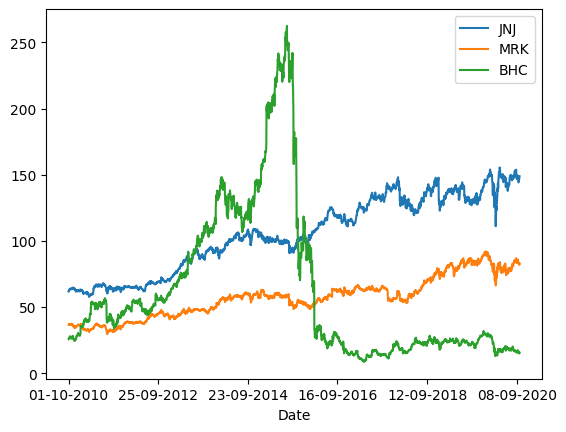

In [33]:
healthcare.plot()

In [34]:
healthcare_returns=healthcare.pct_change()
healthcare_returns=healthcare_returns.dropna()
healthcare_returns

,JNJ,MRK,BHC
Date,,,
04-10-2010,-0.001296,-0.002186,0.004660
05-10-2010,0.018323,0.013691,0.016621
06-10-2010,0.006529,-0.000270,0.014829
07-10-2010,0.000158,-0.008106,-0.003372
08-10-2010,0.000158,0.005448,0.009023
...,...,...,...
24-09-2020,0.001592,0.006293,-0.033037
25-09-2020,0.006843,-0.002646,0.005256
28-09-2020,0.009955,-0.002050,-0.001961


<Axes: xlabel='Date'>

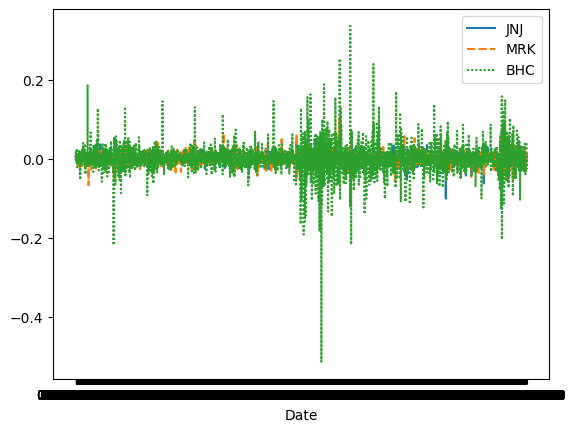

In [35]:
sns.lineplot(healthcare_returns)

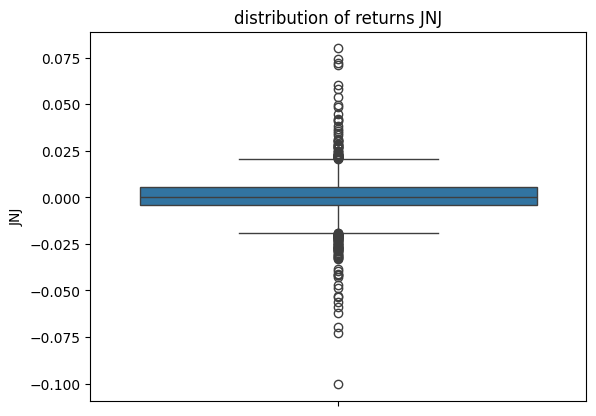

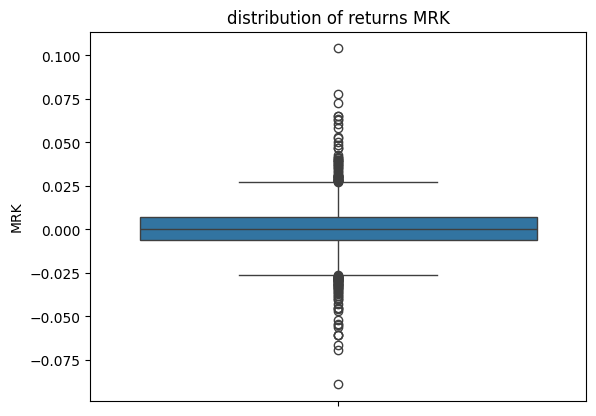

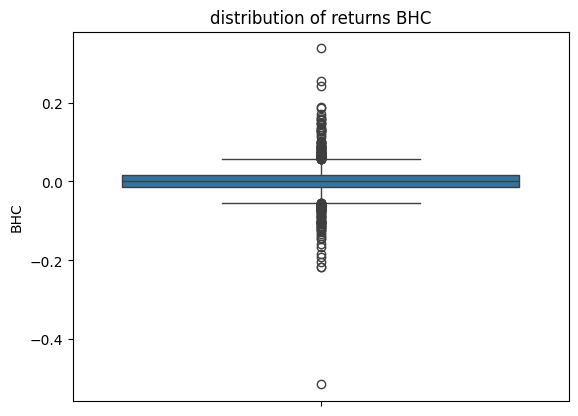

In [36]:
plt.figure()
for col in healthcare_returns.columns:
    sns.boxplot(healthcare_returns[col])
    plt.title("distribution of returns "+col)
    plt.show()

In [37]:
healthcare_summary=healthcare_returns.describe()

In [38]:
healthcare_summary.loc['skew']=healthcare_returns.skew()

In [39]:
healthcare_summary.loc["kurt"]=healthcare_returns.kurt()

In [40]:
healthcare_summary.loc['cummulative_returns']=(1+healthcare_returns).cumprod().iloc[-1]

In [41]:
healthcare_summary

,JNJ,MRK,BHC
count,"2,516.000000","2,516.000000","2,516.000000"
mean,0.000409,0.000410,0.000464
std,0.010847,0.013049,0.035700
min,-0.100379,-0.088990,-0.514629
25%,-0.004283,-0.006119,-0.013011
50%,0.000299,0.000283,0.000431
75%,0.005656,0.007303,0.014973
max,0.079977,0.104080,0.337444
skew,-0.229457,0.159684,-0.763916
kurt,11.053122,6.356581,26.678137


In [42]:
healthcare_summary.loc['annualised_returns']=healthcare_summary.loc['mean']*252

In [43]:
healthcare_summary.loc['annualised_risk']=np.sqrt(252)*healthcare_summary.loc['std']

In [44]:
healthcare_summary.loc['sharpe_ratio']=np.sqrt(252)*healthcare_summary.loc['mean']/healthcare_summary.loc['std']

In [45]:
#healthcare_summary.loc["annualised_sharpe_ratio"]=healthcare_summary.loc['annualised_returns']/healthcare_summary.loc['annualised_risk']

In [46]:
healthcare_summary

,JNJ,MRK,BHC
count,"2,516.000000","2,516.000000","2,516.000000"
mean,0.000409,0.000410,0.000464
std,0.010847,0.013049,0.035700
min,-0.100379,-0.088990,-0.514629
25%,-0.004283,-0.006119,-0.013011
50%,0.000299,0.000283,0.000431
75%,0.005656,0.007303,0.014973
max,0.079977,0.104080,0.337444
skew,-0.229457,0.159684,-0.763916
kurt,11.053122,6.356581,26.678137


# Finance domain

In [48]:
#Credit suisse
CS=pd.read_csv("CS.csv",index_col="Date")
CS=CS.dropna()
CS

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
04-01-2010,49.902344,51.035156,49.765625,50.771484,34.852165,"734,200.000000"
05-01-2010,51.250000,51.318359,50.644531,51.191406,35.140423,"447,700.000000"
06-01-2010,50.224609,50.917969,49.951172,50.478516,34.651054,"751,200.000000"
07-01-2010,51.250000,52.646484,51.201172,52.519531,36.052116,"833,700.000000"
08-01-2010,52.548828,53.339844,52.441406,53.291016,36.581703,"706,900.000000"
...,...,...,...,...,...,...
24-09-2020,9.610000,9.710000,9.540000,9.620000,9.620000,"2,347,300.000000"
25-09-2020,9.380000,9.490000,9.350000,9.480000,9.480000,"2,241,100.000000"
28-09-2020,9.800000,9.970000,9.780000,9.900000,9.900000,"2,165,500.000000"


In [49]:
#Deutsche bank
DB=pd.read_csv("DB.csv",index_col="Date")
DB=DB.dropna()
DB

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
04-01-2010,69.103050,70.162216,68.893127,69.875954,59.037861,"469,500.000000"
05-01-2010,71.412216,71.698471,70.610687,71.211830,60.166534,"503,300.000000"
06-01-2010,69.847328,70.543892,69.494278,69.980919,59.126545,"495,000.000000"
07-01-2010,70.133591,70.896950,69.809158,70.772903,59.795689,"700,100.000000"
08-01-2010,72.891220,73.416031,72.509544,73.330154,61.956295,"763,900.000000"
...,...,...,...,...,...,...
24-09-2020,8.080000,8.220000,8.010000,8.110000,8.110000,"3,842,200.000000"
25-09-2020,7.900000,8.010000,7.840000,8.000000,8.000000,"5,570,900.000000"
28-09-2020,8.290000,8.510000,8.260000,8.430000,8.430000,"4,359,600.000000"


In [50]:
# Goldman Sachs
GS=pd.read_csv("GS.csv",index_col="Date")
GS=GS.dropna()
GS

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
04-01-2010,170.050003,174.250000,169.509995,173.080002,147.920776,"9,135,000.000000"
05-01-2010,173.000000,176.259995,172.570007,176.139999,150.535919,"11,659,400.000000"
06-01-2010,175.380005,175.380005,173.759995,174.259995,148.929138,"7,381,100.000000"
07-01-2010,174.320007,178.750000,173.949997,177.669998,151.843475,"8,727,400.000000"
08-01-2010,176.330002,177.429993,173.949997,174.309998,148.971909,"7,268,100.000000"
...,...,...,...,...,...,...
24-09-2020,188.979996,197.460007,187.050003,195.110001,195.110001,"5,114,600.000000"
25-09-2020,192.960007,195.389999,189.610001,194.949997,194.949997,"3,106,000.000000"
28-09-2020,197.779999,201.869995,197.149994,199.070007,199.070007,"3,280,100.000000"


In [51]:
finance=pd.concat([CS["Close"],DB['Close'],GS["Close"]],axis=1)
finance.columns=["CS","DB","GS"]
finance

,CS,DB,GS
Date,,,
04-01-2010,50.771484,69.875954,173.080002
05-01-2010,51.191406,71.211830,176.139999
06-01-2010,50.478516,69.980919,174.259995
07-01-2010,52.519531,70.772903,177.669998
08-01-2010,53.291016,73.330154,174.309998
...,...,...,...
24-09-2020,9.620000,8.110000,195.110001
25-09-2020,9.480000,8.000000,194.949997
28-09-2020,9.900000,8.430000,199.070007


<Axes: xlabel='Date'>

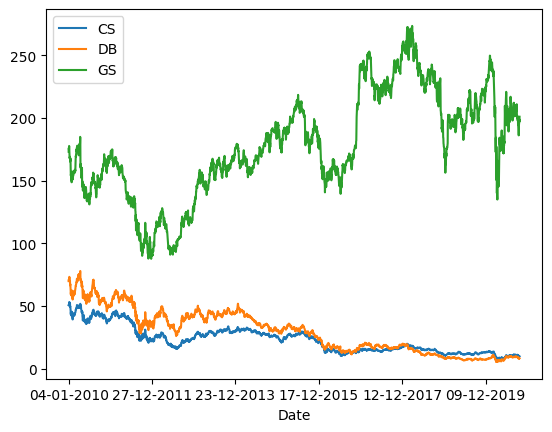

In [52]:
finance.plot()

In [53]:
finance_returns=finance.pct_change()

<Axes: xlabel='Date'>

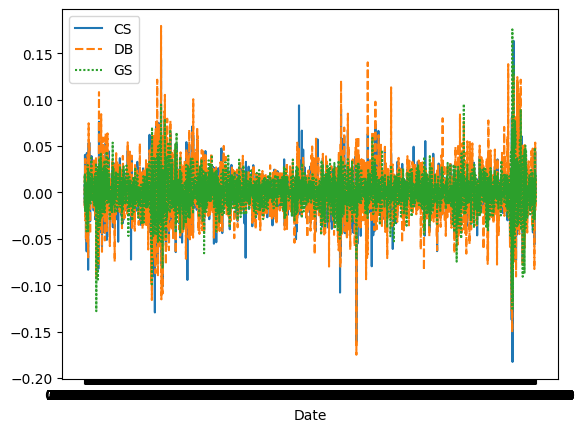

In [54]:
sns.lineplot(finance_returns)

In [55]:
finance_summary=finance_returns.describe()

In [56]:
finance_summary.loc['skew']=finance_returns.skew()

In [57]:
finance_summary.loc['kurt']=finance_returns.kurt()

In [58]:
finance_summary.loc['cummulative_returns']=(1+finance_returns).cumprod().iloc[-1]

In [59]:
finance_summary.loc['annualised_returns']=finance_summary.loc['mean']*252

In [60]:
finance_summary.loc['annualised_risk']=np.sqrt(252)*finance_summary.loc['std']

In [61]:
finance_summary.loc['sharpe_ratio']=np.sqrt(252)*finance_summary.loc['mean']/finance_summary.loc['std']

In [62]:
finance_summary

,CS,DB,GS
count,"2,704.000000","2,704.000000","2,704.000000"
mean,-0.000349,-0.000431,0.000227
std,0.022406,0.026531,0.018521
min,-0.182598,-0.174888,-0.127910
25%,-0.010945,-0.014126,-0.008472
50%,0.000000,-0.000473,0.000410
75%,0.010994,0.013870,0.009413
max,0.163447,0.179506,0.175803
skew,-0.372042,0.185541,-0.095058
kurt,7.538985,4.548859,9.600809


# Technology 

In [64]:
# Apple
AAPL=pd.read_csv("AAPL.csv",index_col="Date")
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
01-10-2010,10.219643,10.235000,10.048214,10.090000,8.719163,448142800
04-10-2010,10.057143,10.103572,9.920357,9.951428,8.599421,435302000
05-10-2010,10.071428,10.337500,10.065000,10.319285,8.917298,501967200
06-10-2010,10.342500,10.428214,10.187857,10.328215,8.925013,670868800
07-10-2010,10.369286,10.374286,10.246786,10.329286,8.925941,408399600
...,...,...,...,...,...,...
24-09-2020,105.169998,110.250000,105.000000,108.220001,108.220001,167743300
25-09-2020,108.430000,112.440002,107.669998,112.279999,112.279999,149981400
28-09-2020,115.010002,115.320000,112.779999,114.959999,114.959999,137672400


In [65]:
# Amazon
AMZN=pd.read_csv("AMZN.csv",index_col="Date")
AMZN=AMZN.dropna()
AMZN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
01-10-2010,157.080002,157.440002,152.199997,153.710007,153.710007,"8,683,400.000000"
04-10-2010,153.949997,155.960007,152.789993,155.389999,155.389999,"5,346,500.000000"
05-10-2010,157.080002,161.210007,157.009995,160.869995,160.869995,"5,620,000.000000"
06-10-2010,160.600006,160.679993,154.600006,155.399994,155.399994,"6,060,800.000000"
07-10-2010,156.509995,157.399994,153.389999,156.270004,156.270004,"4,622,000.000000"
...,...,...,...,...,...,...
24-09-2020,"2,977.790039","3,069.300049","2,965.000000","3,019.790039","3,019.790039","5,529,400.000000"
25-09-2020,"3,054.860107","3,101.540039","2,999.000000","3,095.129883","3,095.129883","4,615,200.000000"
28-09-2020,"3,148.850098","3,175.040039","3,117.169922","3,174.050049","3,174.050049","4,224,200.000000"


In [66]:
# google
GOOG=pd.read_csv("GOOG.csv",index_col="Date")
GOOG=GOOG.dropna()

In [67]:
technology=pd.concat([AAPL["Close"],AMZN['Close'],GOOG["Close"]],axis=1)
technology=technology.dropna()
technology.columns=['AAPL','AMZN',"GOOG"]

<Axes: xlabel='Date'>

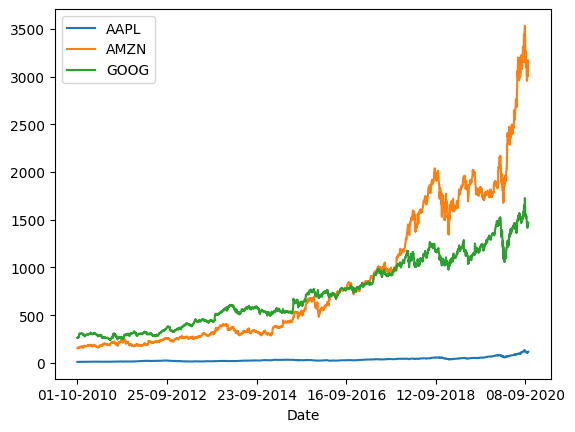

In [68]:
technology.plot()

In [69]:
technology_returns=technology.pct_change()
technology_returns=technology_returns.dropna()

<Axes: xlabel='Date'>

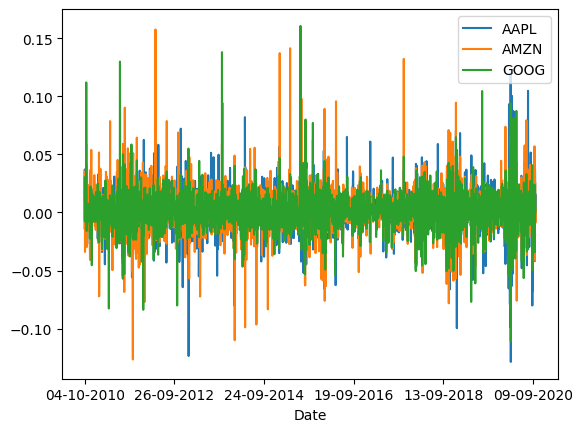

In [70]:
technology_returns.plot()

In [71]:
technology_summary=technology_returns.describe()
technology_summary

,AAPL,AMZN,GOOG
count,"2,516.000000","2,516.000000","2,516.000000"
mean,0.001128,0.001398,0.000818
std,0.017719,0.019889,0.016288
min,-0.128647,-0.126568,-0.111008
25%,-0.006971,-0.008133,-0.006431
50%,0.000891,0.001107,0.000659
75%,0.010209,0.011457,0.008646
max,0.119808,0.157457,0.160524


In [72]:
technology_summary.loc['skew']=technology_returns.skew()

In [73]:
technology_summary.loc['kurt']=technology_returns.kurt()

In [74]:
technology_summary.loc['cummulative_returns']=(1+technology_returns).cumprod().iloc[-1]

In [75]:
technology_summary.loc['annualised_returns']=technology_summary.loc["mean"]*252

In [76]:
technology_summary.loc['annualised_risk']=np.sqrt(252)*technology_summary.loc['std']

In [77]:
technology_summary.loc['sharpe_ratio']=np.sqrt(252)*technology_summary.loc['mean']/technology_summary.loc['std']

In [78]:
technology_summary

,AAPL,AMZN,GOOG
count,"2,516.000000","2,516.000000","2,516.000000"
mean,0.001128,0.001398,0.000818
std,0.017719,0.019889,0.016288
min,-0.128647,-0.126568,-0.111008
25%,-0.006971,-0.008133,-0.006431
50%,0.000891,0.001107,0.000659
75%,0.010209,0.011457,0.008646
max,0.119808,0.157457,0.160524
skew,-0.133723,0.424676,0.730819
kurt,6.638518,7.550372,12.434720


In [79]:
all_securities=pd.concat([aviation_summary,finance_summary,healthcare_summary,technology_summary],axis=1)
all_securities

,AAL,ALK,HA,CS,DB,GS,JNJ,MRK,BHC,AAPL,AMZN,GOOG
count,"2,516.000000","2,516.000000","2,516.000000","2,704.000000","2,704.000000","2,704.000000","2,516.000000","2,516.000000","2,516.000000","2,516.000000","2,516.000000","2,516.000000"
mean,0.000637,0.000709,0.000765,-0.000349,-0.000431,0.000227,0.000409,0.000410,0.000464,0.001128,0.001398,0.000818
std,0.032726,0.023562,0.030147,0.022406,0.026531,0.018521,0.010847,0.013049,0.035700,0.017719,0.019889,0.016288
min,-0.252246,-0.232385,-0.269722,-0.182598,-0.174888,-0.127910,-0.100379,-0.088990,-0.514629,-0.128647,-0.126568,-0.111008
25%,-0.014116,-0.010126,-0.013826,-0.010945,-0.014126,-0.008472,-0.004283,-0.006119,-0.013011,-0.006971,-0.008133,-0.006431
50%,0.000216,0.000788,0.000451,0.000000,-0.000473,0.000410,0.000299,0.000283,0.000431,0.000891,0.001107,0.000659
75%,0.015593,0.011655,0.015317,0.010994,0.013870,0.009413,0.005656,0.007303,0.014973,0.010209,0.011457,0.008646
max,0.410970,0.203079,0.245837,0.163447,0.179506,0.175803,0.079977,0.104080,0.337444,0.119808,0.157457,0.160524
skew,1.261197,-0.397897,-0.173215,-0.372042,0.185541,-0.095058,-0.229457,0.159684,-0.763916,-0.133723,0.424676,0.730819
kurt,19.727388,14.243136,11.258744,7.538985,4.548859,9.600809,11.053122,6.356581,26.678137,6.638518,7.550372,12.434720


In [80]:
all_securities.loc['sharpe_ratio']

AAL     0.308927
ALK     0.477998
HA      0.402915
CS     -0.247079
DB     -0.258165
GS      0.194750
JNJ     0.598237
MRK     0.499102
BHC     0.206406
AAPL    1.010278
AMZN    1.115496
GOOG    0.796808
Name: sharpe_ratio, dtype: float64

In [81]:
# Despite the the low sharpe ration we are diversifying the investments for being conservative

In [82]:
from scipy.optimize import minimize

In [83]:
def negative_weighted_sharpe(weights, sharpe_values):
    return -np.dot(weights, sharpe_values)

def get_weight(sharpe_values):
# Constraints and bounds
    num_assets = len(sharpe_values)
    bounds = [(0, 1)] * num_assets
    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    
    # Initial guess: equal weights
    init_guess = np.array([1/num_assets] * num_assets)
    
    # Optimization
    result = minimize(negative_weighted_sharpe, init_guess, args=(sharpe_values.values,),
                      method='SLSQP', bounds=bounds, constraints=constraints)
    
    # Final weights
    optimal_weights = pd.Series(result.x, index=sharpe_values.index)
    optimal_weights = optimal_weights[optimal_weights > 0.01].sort_values(ascending=False)  # Filter small weights
    
    # Display
    print("🔍 Optimized Portfolio Weights Based on Sharpe Ratio:")
    return optimal_weights
get_weight(all_securities.loc['sharpe_ratio'])

🔍 Optimized Portfolio Weights Based on Sharpe Ratio:


AMZN   1.000000
dtype: float64

In [84]:
#to get second best stock we drop amzn out of picture
get_weight(all_securities.loc["sharpe_ratio"].drop("AMZN"))

🔍 Optimized Portfolio Weights Based on Sharpe Ratio:


AAPL   1.000000
dtype: float64

In [85]:
get_weight(all_securities.loc["sharpe_ratio"].drop(["AMZN","AAPL"]))

🔍 Optimized Portfolio Weights Based on Sharpe Ratio:


GOOG   1.000000
dtype: float64

In [86]:
get_weight(all_securities.loc["sharpe_ratio"].drop(["AMZN","AAPL","GOOG"]))

🔍 Optimized Portfolio Weights Based on Sharpe Ratio:


JNJ   1.000000
dtype: float64

In [87]:
get_weight(all_securities.loc["sharpe_ratio"].drop(["AMZN","AAPL","GOOG","JNJ"]))

🔍 Optimized Portfolio Weights Based on Sharpe Ratio:


MRK   1.000000
dtype: float64

We are deciding to go forward with following stocks
- Amazon
- Apple Inc
- Alphabet
- Johnson & Johnson
- Merck and CO inc.

We are not going with finance and aviation domain due to low sharpe ratio

In [89]:
import numpy as np
import pandas as pd
from itertools import combinations
from scipy.optimize import minimize

# Sharpe ratios as given
sharpe_series = pd.Series(all_securities.loc['sharpe_ratio'])
def optimize_subset(assets_subset, sharpe_series):
    n = len(assets_subset)
    #asset_subset=list(assets_subset)
    #print(sharpe_series[[assets_subset]])
    sharpe_values = sharpe_series[list(assets_subset)].values

    def neg_weighted_sharpe(w): return -np.dot(w, sharpe_values)

    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1)] * n
    init_guess = [1/n] * n
    res = minimize(neg_weighted_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    #print(pd.Series(res.x, index=assets_subset))
    return -res.fun, pd.Series(res.x, index=assets_subset)

# Store results
best_sharpe = -np.inf
best_weights = None

# Try all combinations of 4 or 5 stocks
for size in [4, 5]:
    for combo in combinations(sharpe_series.index, size):
            sharpe, weights = optimize_subset(combo, sharpe_series)
            if sharpe > best_sharpe:
                best_sharpe = sharpe
                best_weights = weights

# Final output
print("🏆 Best 4/5-stock Portfolio by Sharpe Ratio:")
print(best_weights.sort_values(ascending=False))
print(f"\nSharpe Ratio: {best_sharpe:.4f}")


🏆 Best 4/5-stock Portfolio by Sharpe Ratio:
AMZN   1.000000
AAPL   0.000000
HA     0.000000
DB     0.000000
BHC    0.000000
dtype: float64

Sharpe Ratio: 1.1155


In [90]:
stocks = ['AMZN',"AAPL",'GOOG',"JNJ"]
initial_weight = np.array([0.50, 0.150, 0.15,0.2])

In [91]:
returns=pd.concat([technology_returns[['AMZN',"AAPL",'GOOG']],healthcare_returns['JNJ']],axis=1)
returns

,AMZN,AAPL,GOOG,JNJ
Date,,,,
04-10-2010,0.010930,-0.013734,-0.006221,-0.001296
05-10-2010,0.035266,0.036965,0.030401,0.018323
06-10-2010,-0.034003,0.000865,-0.007209,0.006529
07-10-2010,0.005599,0.000104,-0.008122,0.000158
08-10-2010,-0.004607,0.016769,0.011962,0.000158
...,...,...,...,...
24-09-2020,0.006644,0.010269,0.009242,0.001592
25-09-2020,0.024949,0.037516,0.011671,0.006843
28-09-2020,0.025498,0.023869,0.013537,0.009955


In [92]:
# Portfolio daily returns
returns['Portfolio_Daily_Return'] = returns.dot(initial_weight)

Portfolio Risk – Portfolio Standard Deviation
image.png

By looking into the portfolio standard deviation formula, we need three elements:

Portfolio weight array
Portfolio covariance matrix
Transpose of portfolio weight array

In [94]:
covariance_portfolio = returns.iloc[:,:-1]
covariance_portfolio = (covariance_portfolio.cov())*252

covariance_portfolio

,AMZN,AAPL,GOOG,JNJ
AMZN,0.099689,0.038568,0.046959,0.017524
AAPL,0.038568,0.079115,0.038189,0.018014
GOOG,0.046959,0.038189,0.066854,0.018386
JNJ,0.017524,0.018014,0.018386,0.029648


In [95]:
# Applying the matrix operations mentioned in the image above
portfolio_variance = np.dot(initial_weight.T,np.dot(covariance_portfolio, initial_weight))
# Standard deviation (risk of portfolio)
portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

0.2227749934241994

In [96]:
# Assuming that the risk free rate is zero
Sharpe_Ratio = returns['Portfolio_Daily_Return'].mean() / returns['Portfolio_Daily_Return'].std()
Annualised_Sharpe_Ratio = (252**0.5)*Sharpe_Ratio
Annualised_Sharpe_Ratio

1.2130196364413752

1.21 is good sharpe ratio

In [98]:
returns.isna().sum()

AMZN                      0
AAPL                      0
GOOG                      0
JNJ                       0
Portfolio_Daily_Return    0
dtype: int64

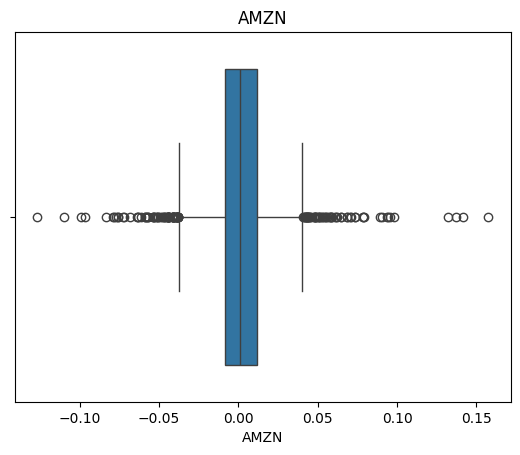

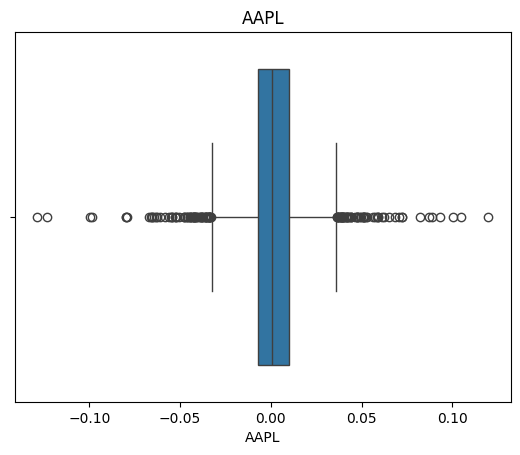

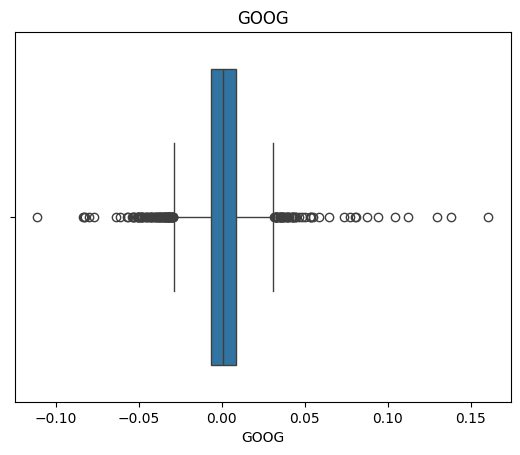

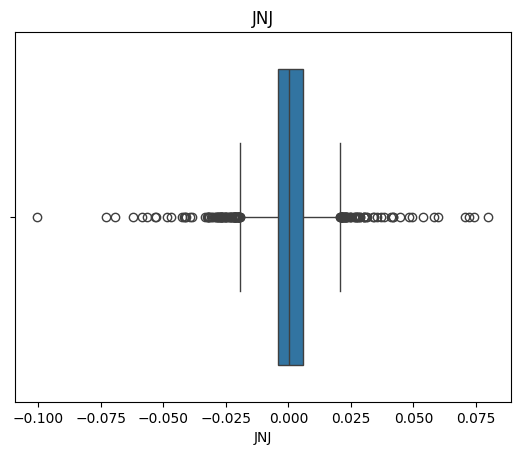

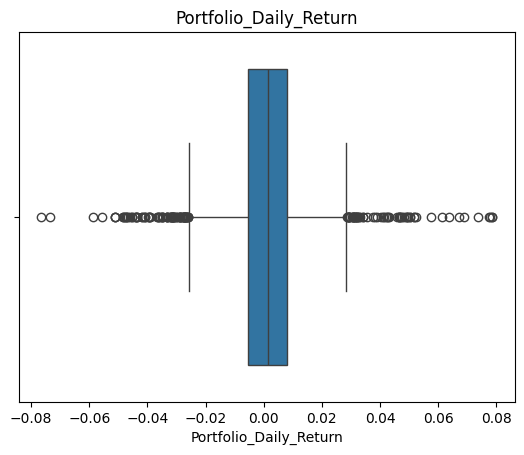

In [99]:
for col in returns.columns:
    sns.boxplot(x=returns[col],whis=1.5)
    plt.title(col)
    plt.show()

In [100]:
# Replacing the outliers with the median value
for col in returns.columns:
    Q1 = returns[col].quantile(0.25)
    Q3 = returns[col].quantile(0.75)
    IQR = Q3 - Q1
    
    col_median = returns[col].median()
    
    # IQR
    returns[col] = np.where(returns[col] < (Q1 - 1.5 * IQR), col_median, returns[col])
    returns[col] = np.where(returns[col] > (Q3 + 1.5 * IQR), col_median, returns[col])

# Stationarity Test

In [102]:
from statsmodels.tsa.stattools import kpss

def kpss_test(dataframe):
    for col in dataframe.columns:
        kpss_test = kpss(dataframe[col])
        
        print(col)
        print('KPSS Statistic: %f' % kpss_test[0])
        print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
        print('p-value: %f' % kpss_test[1])
        
        if kpss_test[1] <= 0.05:
            print("\nSeries is Stationary")
        else:
            print("\nSeries is Non-Stationary")
            
        print('\n--------------------------------------\n')
kpss_test(returns)

AMZN
KPSS Statistic: 0.136692
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------

AAPL
KPSS Statistic: 0.335153
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------

GOOG
KPSS Statistic: 0.171788
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------

JNJ
KPSS Statistic: 0.175878
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------

Portfolio_Daily_Return
KPSS Statistic: 0.487133
Critical Values @ 0.05: 0.46
p-value: 0.044565

Series is Stationary

--------------------------------------



/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range o

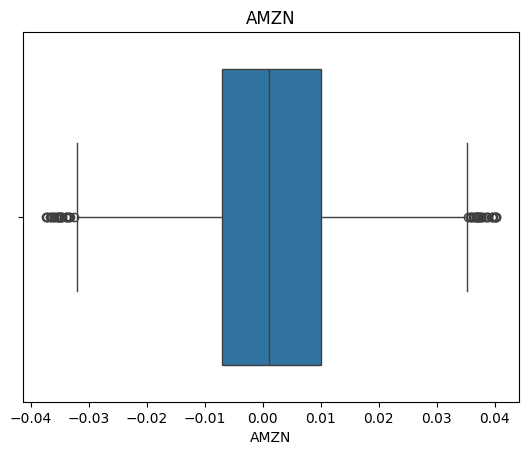

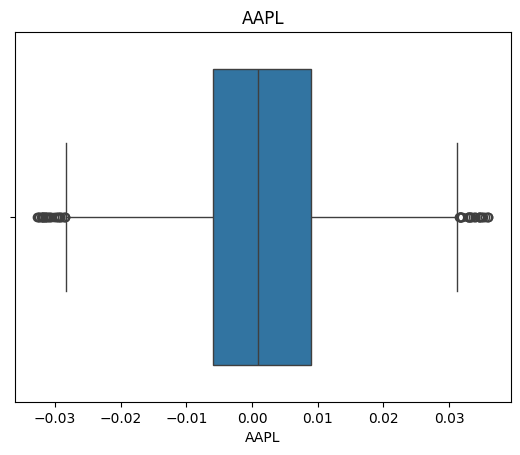

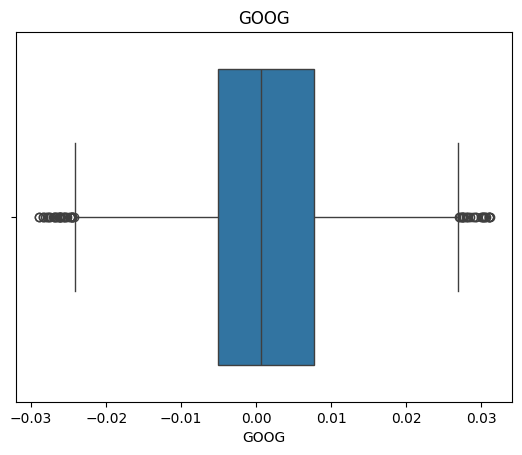

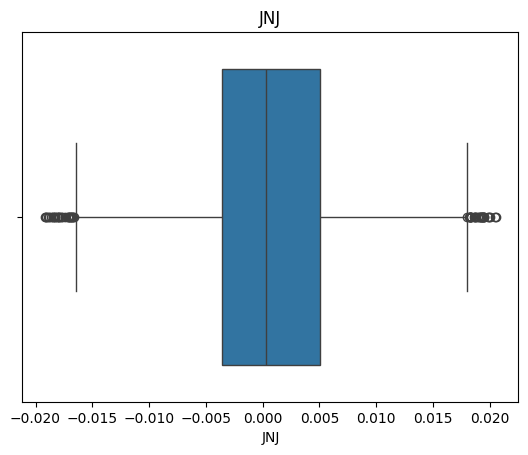

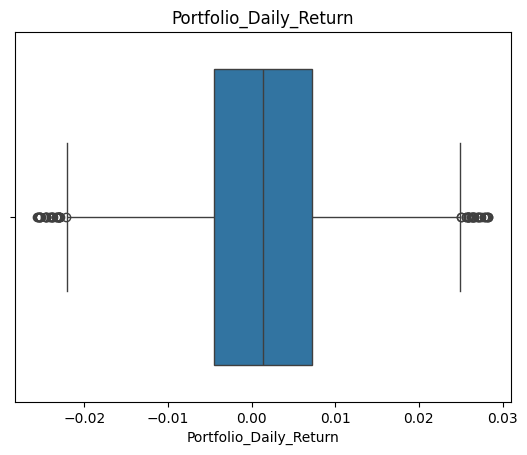

In [103]:
for col in returns.columns:
    sns.boxplot(x=returns[col],whis=1.5)
    plt.title(col)
    plt.show()

In [104]:
# Replacing the outliers with the median value again
for col in returns.columns:
    Q1 = returns[col].quantile(0.25)
    Q3 = returns[col].quantile(0.75)
    IQR = Q3 - Q1
    
    col_median = returns[col].median()
    
    # IQR
    returns[col] = np.where(returns[col] < (Q1 - 1.5 * IQR), col_median, returns[col])
    returns[col] = np.where(returns[col] > (Q3 + 1.5 * IQR), col_median, returns[col])

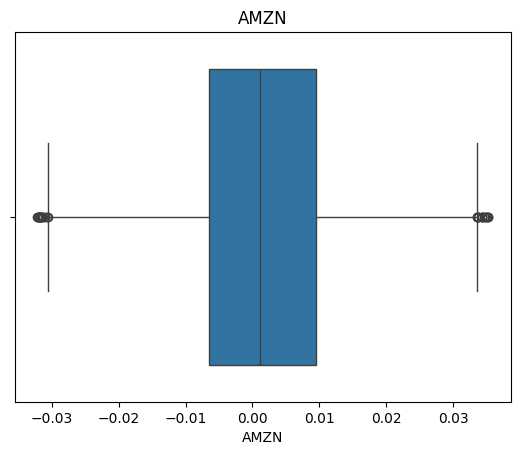

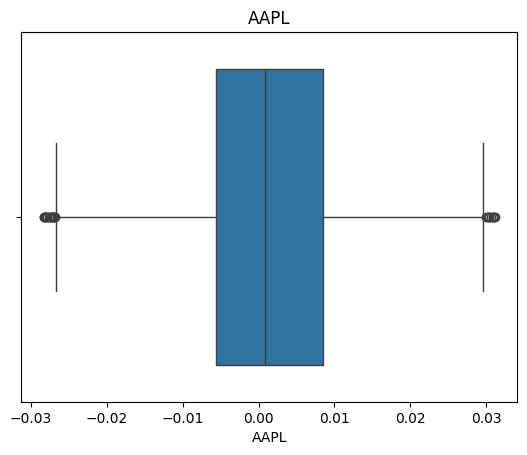

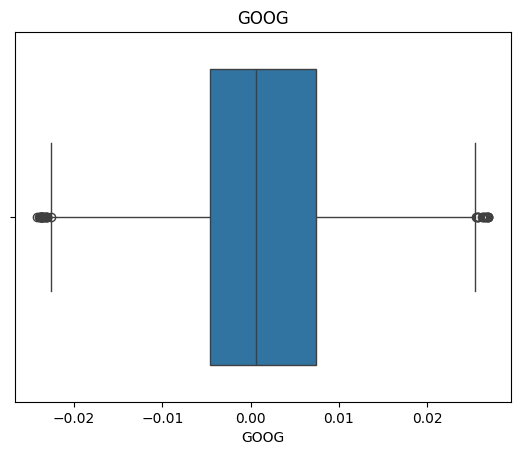

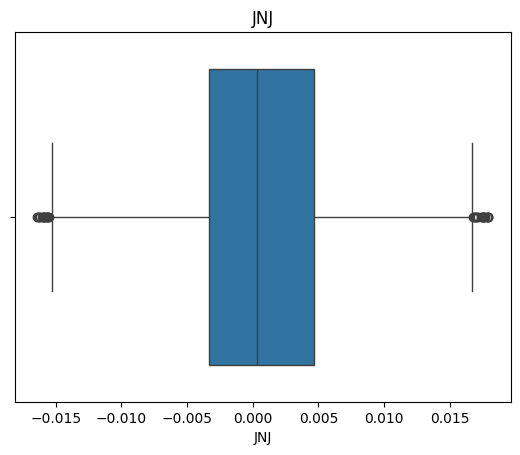

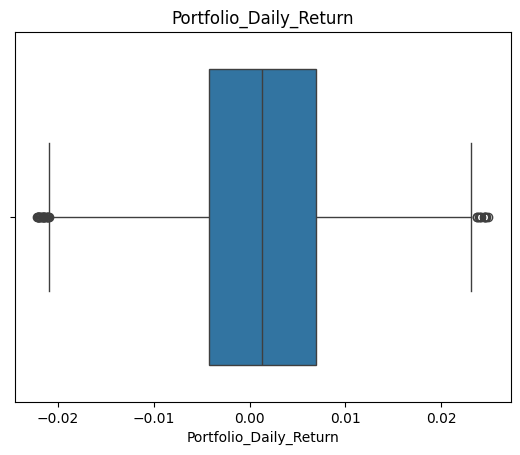

In [105]:
for col in returns.columns:
    sns.boxplot(x=returns[col],whis=1.5)
    plt.title(col)
    plt.show()

In [106]:
# Apply Yeo-Johnson Transformation because returns are negative as well
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=False)
transformed = pt.fit_transform(returns)
transformed = pd.DataFrame(transformed, columns=returns.columns, index=returns.index)
transformed

,AMZN,AAPL,GOOG,JNJ,Portfolio_Daily_Return
Date,,,,,
04-10-2010,0.010961,-0.013651,-0.006214,-0.001298,0.002218
05-10-2010,0.035586,0.000891,0.000659,0.000299,0.001310
06-10-2010,0.001107,0.000866,-0.007199,0.006475,-0.016343
07-10-2010,0.005607,0.000104,-0.008110,0.000158,0.001631
08-10-2010,-0.004602,0.016893,0.011988,0.000158,0.002042
...,...,...,...,...,...
24-09-2020,0.006655,0.010315,0.009258,0.001589,0.006615
25-09-2020,0.025109,0.000891,0.011696,0.006784,0.021728
28-09-2020,0.025666,0.024119,0.013570,0.009830,0.020817


In [107]:
transformed.columns

Index(['AMZN', 'AAPL', 'GOOG', 'JNJ', 'Portfolio_Daily_Return'], dtype='object')

In [108]:
kpss_test(transformed)

AMZN
KPSS Statistic: 0.114990
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------

AAPL
KPSS Statistic: 0.486104
Critical Values @ 0.05: 0.46
p-value: 0.044796

Series is Stationary

--------------------------------------

GOOG
KPSS Statistic: 0.501569
Critical Values @ 0.05: 0.46
p-value: 0.041313

Series is Stationary

--------------------------------------

JNJ
KPSS Statistic: 0.216288
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------

Portfolio_Daily_Return
KPSS Statistic: 0.359713
Critical Values @ 0.05: 0.46
p-value: 0.094520

Series is Non-Stationary

--------------------------------------



/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(dataframe[col])


In [109]:
from statsmodels.tsa.stattools import adfuller
for col in  returns.columns:
    result = adfuller(transformed[col])
    print(col)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')  # p < 0.05 → stationary
    if result[1] <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
            
    print('\n--------------------------------------\n')

AMZN
ADF Statistic: -50.20563972697525
p-value: 0.0

Series is Stationary

--------------------------------------

AAPL
ADF Statistic: -48.7606679497373
p-value: 0.0

Series is Stationary

--------------------------------------

GOOG
ADF Statistic: -49.68124240923305
p-value: 0.0

Series is Stationary

--------------------------------------

JNJ
ADF Statistic: -51.22607189729106
p-value: 0.0

Series is Stationary

--------------------------------------

Portfolio_Daily_Return
ADF Statistic: -49.73284296172719
p-value: 0.0

Series is Stationary

--------------------------------------



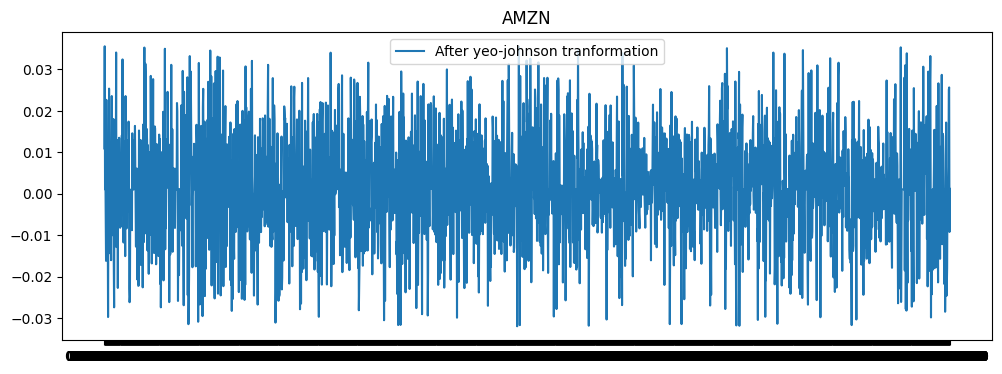

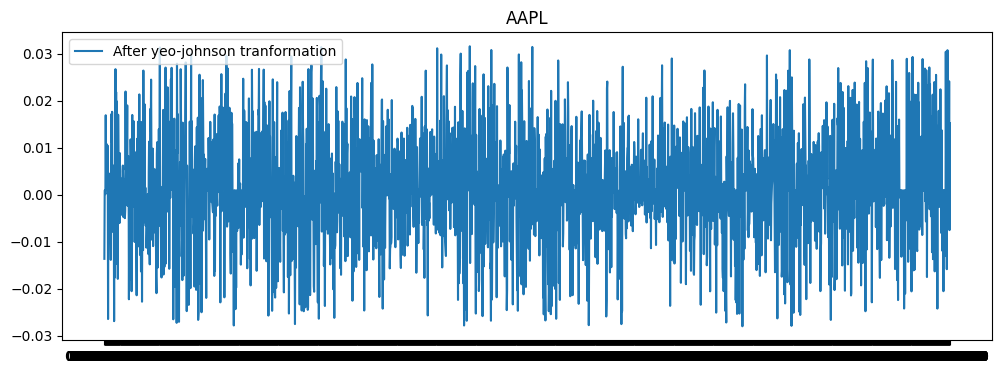

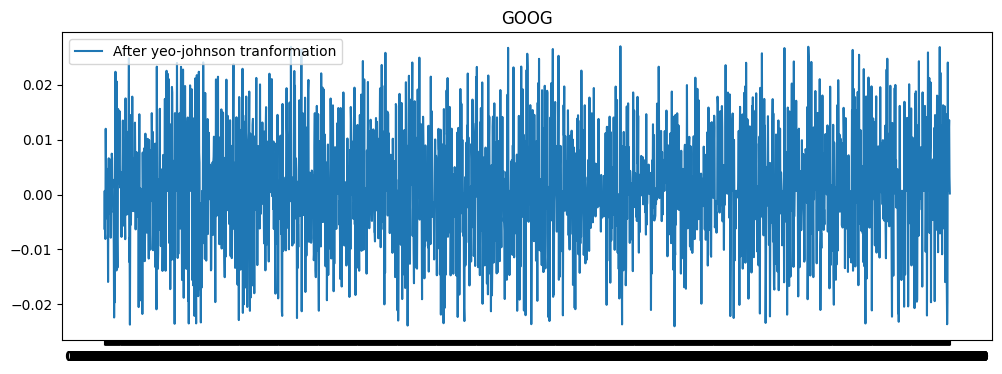

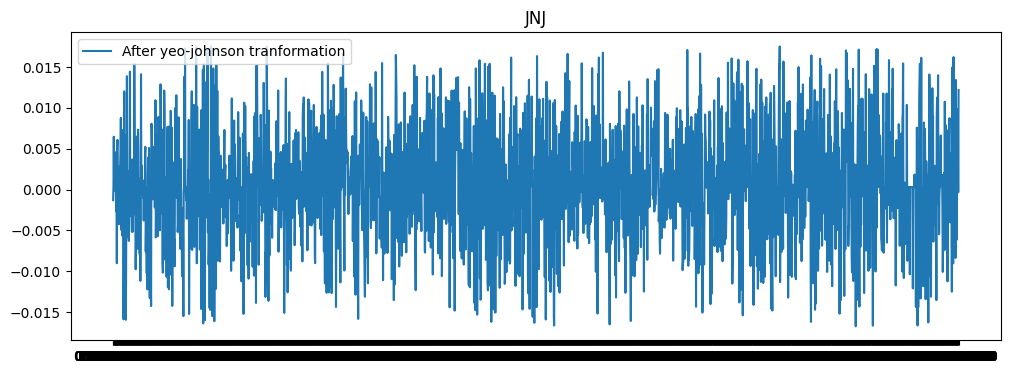

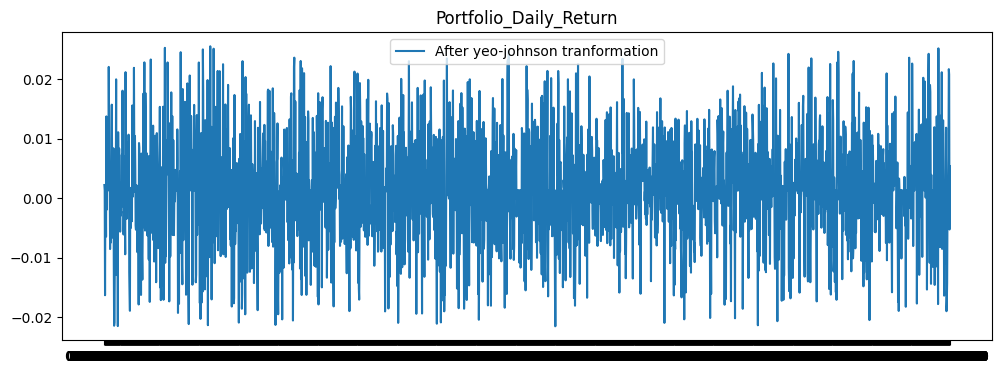

In [110]:
for col in transformed.columns:   
     plt.figure(figsize=(12,4))
     plt.plot(transformed[col], label='After yeo-johnson tranformation')
     plt.legend(loc='best')
     plt.title(col)
     plt.show()

In [111]:
#transformed_diff = transformed.diff().dropna() # Differencing all variables to get rid of Stationarity

In [112]:
#kpss_test(transformed_diff)

In [113]:
# for col in transformed_diff.columns:   
#     plt.figure(figsize=(12,4))
#     plt.plot(transformed_diff[col], label='After yeo-johnson tranformation and diff')
#     plt.legend(loc='best')
#     plt.title(col)
#     plt.show()

In [114]:
# for col in  returns.columns:
#     result = adfuller(transformed[col])
#     print(col)
#     print(f'ADF Statistic: {result[0]}')
#     print(f'p-value: {result[1]}')  # p < 0.05 → stationary
#     if result[1] <= 0.05:
#         print("\nSeries is Stationary")
#     else:
#         print("\nSeries is Non-Stationary")
            
#     print('\n--------------------------------------\n')

In [115]:
# Differencing all variables to get rid of Stationarity in case the first iteration is not enough
#transformed_diff_2 = transformed_diff.diff().dropna()

In [116]:
#transformed_diff_2.plot()

In [117]:
#kpss_test(transformed_diff_2)

In [118]:
# for col in transformed_diff_2.columns:
#     result = adfuller(transformed_diff_2[col])
#     print(f'ADF Statistic: {result[0]}')
#     print(f'p-value: {result[1]}')  # p < 0.05 → stationary
#     if result[1] <= 0.05:
#         print("\nSeries is Stationary")
#     else:
#         print("\nSeries is Non-Stationary")

In [119]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# result = seasonal_decompose(transformed_diff_2[ 'Portfolio_Daily_Return'], model='additive', period=12)
# result.plot()

In [120]:
#residuals = result.resid.dropna()

In [121]:
# kpss_test = kpss(residuals)
# print(col)
# print('KPSS Statistic: %f' % kpss_test[0])
# print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
# print('p-value: %f' % kpss_test[1]) 
# if kpss_test[1] <= 0.05:
#     print("\nSeries is Stationary")
# else:
#     print("\nSeries is Non-Stationary")

In [122]:
# from statsmodels.tsa.stattools import adfuller

# result = adfuller(residuals)
# print(f'ADF Statistic: {result[0]}')
# print(f'p-value: {result[1]}')  # p < 0.05 → stationary

In [123]:
# Keeping 70% values as train
train_len = int(returns.shape[0]*0.7)
test_len = int(returns.shape[0]) - int(returns.shape[0]*0.7)

# Train data
train_data = returns[:train_len] 

# Test data
test_data = returns[train_len:]
train_data.shape,test_data.shape

((1761, 5), (755, 5))

In [124]:
# Train data - differenced
train_yeo_johnson = transformed[:train_len]
#train_yeo_johnson_diff = transformed_diff[:train_len-1]
#train_yeo_johnson_diff_2 = transformed_diff_2[:train_len-2]

# Test data - differenced
test_yeo_johnson = transformed[train_len:]
#test_yeo_johnson_diff = transformed_diff[train_len-1:]
#test_yeo_johnson_diff_2 = transformed_diff_2[train_len-2:]

# Model fitting

In [126]:
# Fitting the VAR model to the data
from statsmodels.tsa.api import VAR

model = VAR(train_yeo_johnson)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [127]:
# To select the lag order
x = model.select_order(maxlags=50)
x.summary()

,AIC,BIC,FPE,HQIC
0,-48.66*,-48.64*,7.372e-22*,-48.65*
1,-48.65,-48.55,7.437e-22,-48.62
2,-48.63,-48.46,7.564e-22,-48.57
3,-48.62,-48.37,7.661e-22,-48.53
4,-48.61,-48.27,7.751e-22,-48.49
5,-48.60,-48.19,7.788e-22,-48.45
6,-48.60,-48.10,7.838e-22,-48.42
7,-48.58,-48.01,7.982e-22,-48.37
8,-48.58,-47.93,7.997e-22,-48.34
9,-48.56,-47.83,8.108e-22,-48.29


In [128]:
results = model.fit(maxlags=15, ic='aic')

In [129]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 18, Apr, 2025
Time:                     20:02:14
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -48.5992
Nobs:                     1761.00    HQIC:                  -48.6090
Log likelihood:           30316.5    FPE:                7.70695e-22
AIC:                     -48.6147    Det(Omega_mle):     7.68510e-22
--------------------------------------------------------------------
Results for equation AMZN
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.001209         0.000309            3.917           0.000

Results for equation AAPL
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------

In [130]:
results = model.fit(maxlags=0, ic='aic')
results.k_ar
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 18, Apr, 2025
Time:                     20:02:14
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -48.5992
Nobs:                     1761.00    HQIC:                  -48.6090
Log likelihood:           30316.5    FPE:                7.70695e-22
AIC:                     -48.6147    Det(Omega_mle):     7.68510e-22
--------------------------------------------------------------------
Results for equation AMZN
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.001209         0.000309            3.917           0.000

Results for equation AAPL
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------

In [131]:
results = model.fit(maxlags=30, ic='aic')
results.k_ar

0

In [132]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 18, Apr, 2025
Time:                     20:02:14
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -48.5992
Nobs:                     1761.00    HQIC:                  -48.6090
Log likelihood:           30316.5    FPE:                7.70695e-22
AIC:                     -48.6147    Det(Omega_mle):     7.68510e-22
--------------------------------------------------------------------
Results for equation AMZN
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.001209         0.000309            3.917           0.000

Results for equation AAPL
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------

In [133]:
results = model.fit()

In [134]:
lag_order = results.k_ar+1

In [135]:
# Obtaining the forecast values
predicted = results.forecast(y=train_yeo_johnson.values[-lag_order:], steps=test_len)
forecast = pd.DataFrame(predicted, index = returns.index[train_len:], columns = returns.columns)
forecast

,AMZN,AAPL,GOOG,JNJ,Portfolio_Daily_Return
Date,,,,,
02-10-2017,0.001096,0.000601,0.001036,0.000077,0.000995
03-10-2017,0.001215,0.000939,0.000855,0.000438,0.001140
04-10-2017,0.001203,0.000958,0.000866,0.000430,0.001146
05-10-2017,0.001203,0.000958,0.000867,0.000430,0.001146
06-10-2017,0.001203,0.000958,0.000867,0.000430,0.001146
...,...,...,...,...,...
24-09-2020,0.001203,0.000958,0.000867,0.000430,0.001146
25-09-2020,0.001203,0.000958,0.000867,0.000430,0.001146
28-09-2020,0.001203,0.000958,0.000867,0.000430,0.001146


## Inverting the yeo-johnson transformatiom

In [137]:
forecast_values=pt.inverse_transform(forecast)

In [138]:
# Model Evaluation

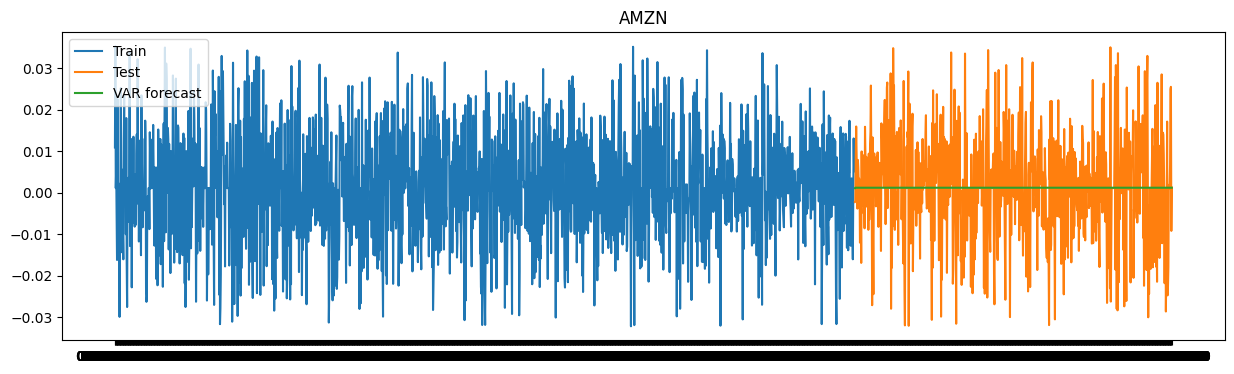

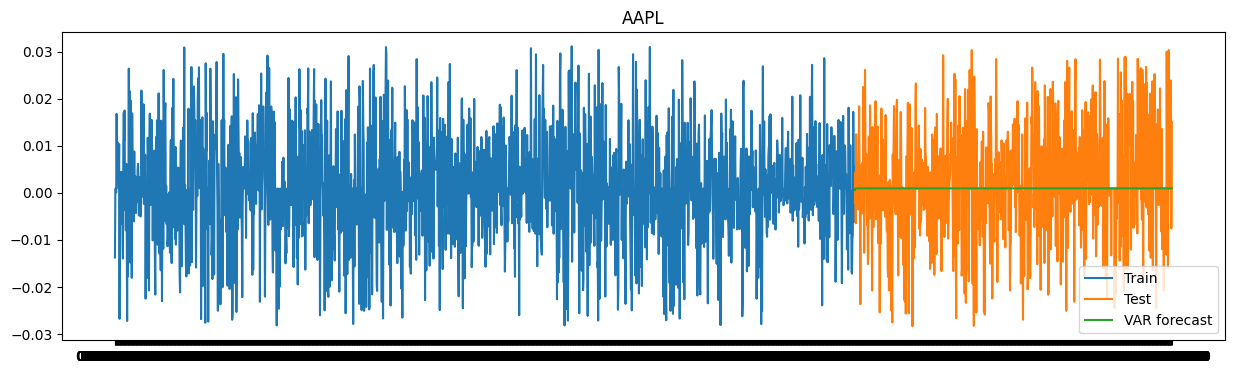

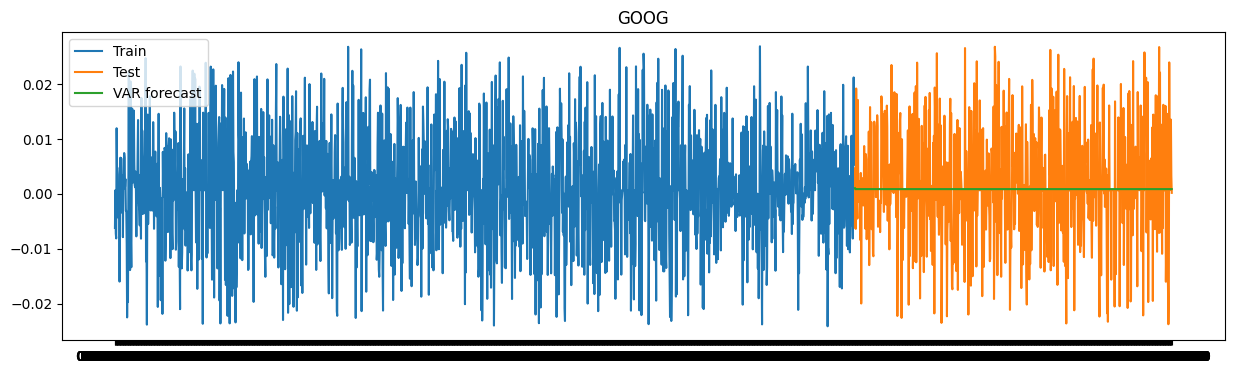

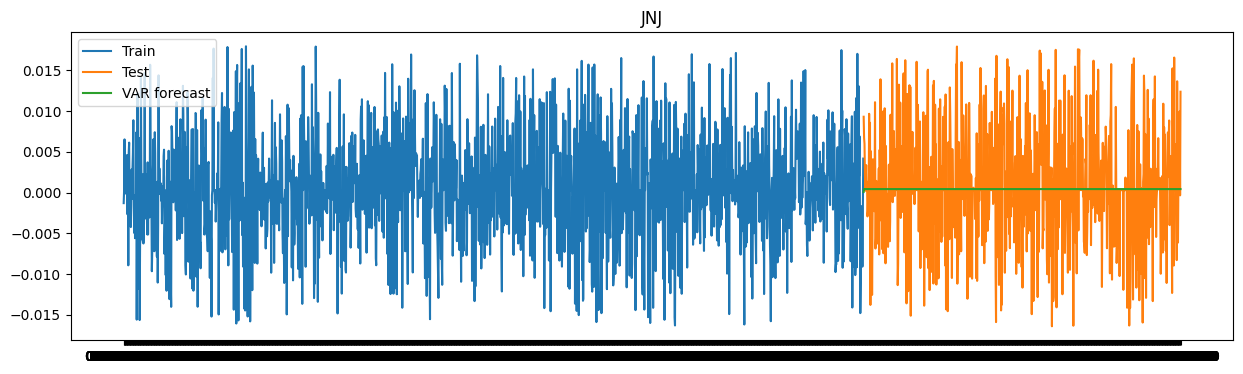

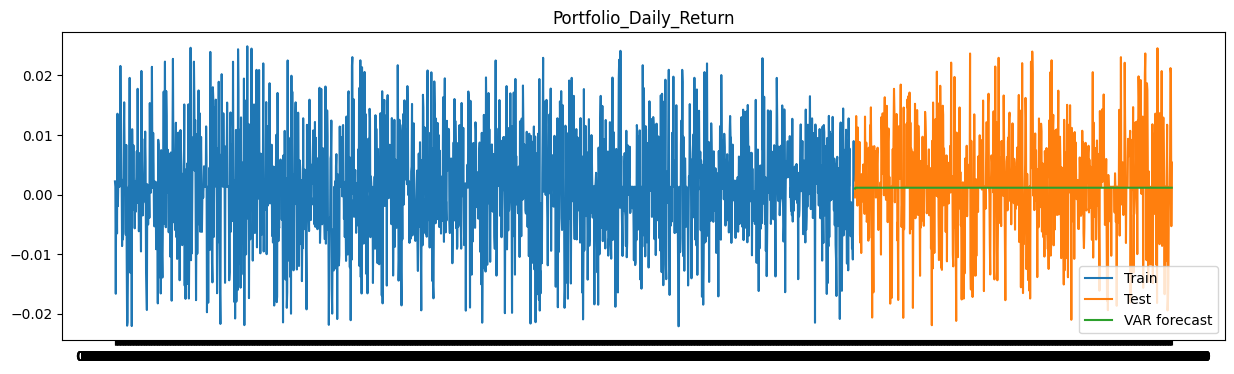

In [139]:
# Printing the train, test and forecasted values
for col in returns.columns:
     plt.figure(figsize=(15,4))
     plt.plot(returns[col][:train_len], label='Train')
     plt.plot(returns[col][train_len:], label='Test')
     plt.plot(forecast[col][:], label='VAR forecast')
     plt.legend(loc='best')
     plt.title(col)
     plt.show()

In [140]:
# Model Evaluation
from sklearn.metrics import mean_squared_error

eval_results = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])
tempResults = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])

for col in returns.columns:
    rmse = np.sqrt(mean_squared_error(test_data[col], forecast[col][:])).round(2)
    mape = np.round(np.mean(np.abs(test_data[col]-forecast[col][:])/test_data[col])*100,2)

    tempResults = pd.DataFrame({'Column':[col], 'RMSE': [rmse],'MAPE': [mape] })
    eval_results = pd.concat([eval_results, tempResults])
    
eval_results

/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2982118819.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eval_results = pd.concat([eval_results, tempResults])


,Column,RMSE,MAPE
0,AMZN,0.010000,inf
0,AAPL,0.010000,inf
0,GOOG,0.010000,-5.110000
0,JNJ,0.010000,inf
0,Portfolio_Daily_Return,0.010000,113.450000


# Lets redo the model with actual stock prices rather than return

In [142]:
stocks=pd.concat([technology,healthcare["JNJ"]],axis=1)
stocks

,AAPL,AMZN,GOOG,JNJ
Date,,,,
01-10-2010,10.090000,153.710007,261.828613,61.750000
04-10-2010,9.951428,155.389999,260.199707,61.669998
05-10-2010,10.319285,160.869995,268.110046,62.799999
06-10-2010,10.328215,155.399994,266.177307,63.209999
07-10-2010,10.329286,156.270004,264.015411,63.220001
...,...,...,...,...
24-09-2020,108.220001,"3,019.790039","1,428.290039",144.669998
25-09-2020,112.279999,"3,095.129883","1,444.959961",145.660004
28-09-2020,114.959999,"3,174.050049","1,464.520020",147.110001


In [143]:
stocks['Portfolio_Daily'] = stocks.dot(initial_weight)

In [144]:
import matplotlib.dates as mdates

def plot_dataframe(df):
    for col in df.columns:
        plt.title(col)
        plt.plot(df[col])
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # every 3 months
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
        plt.xticks(rotation=90)
        plt.show()

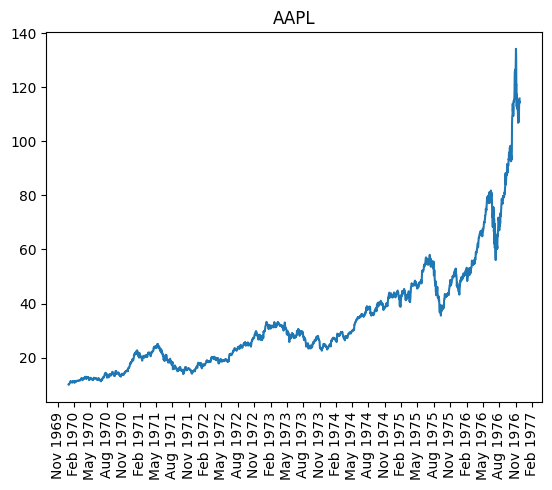

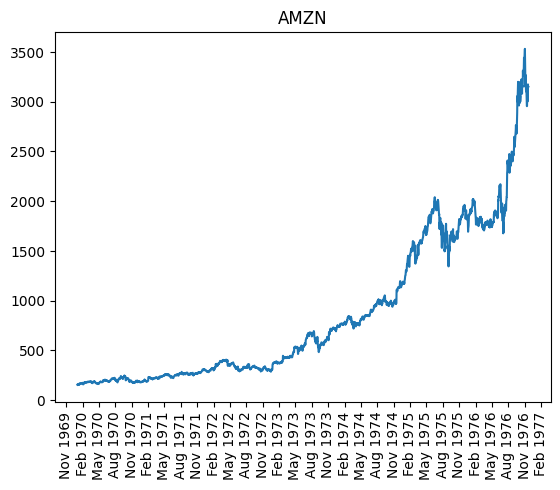

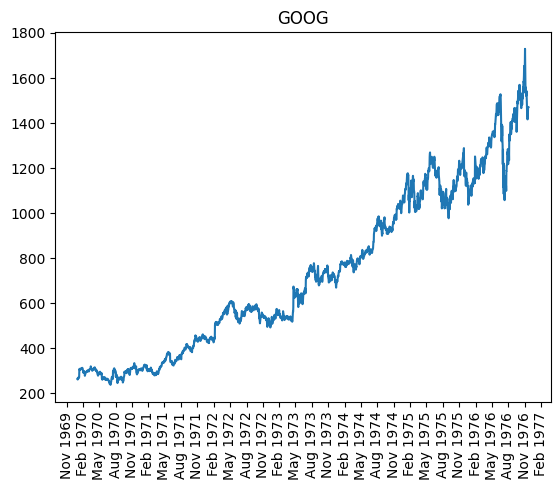

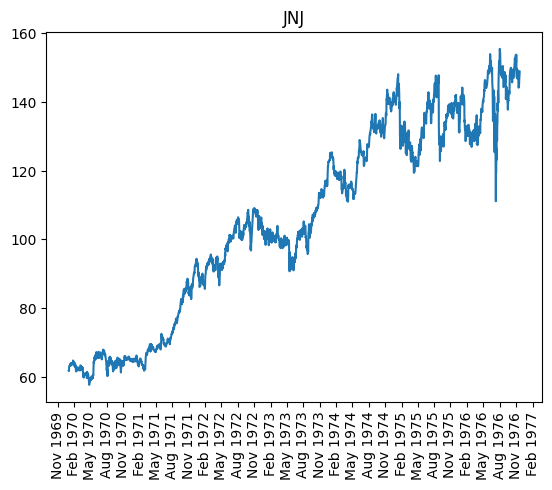

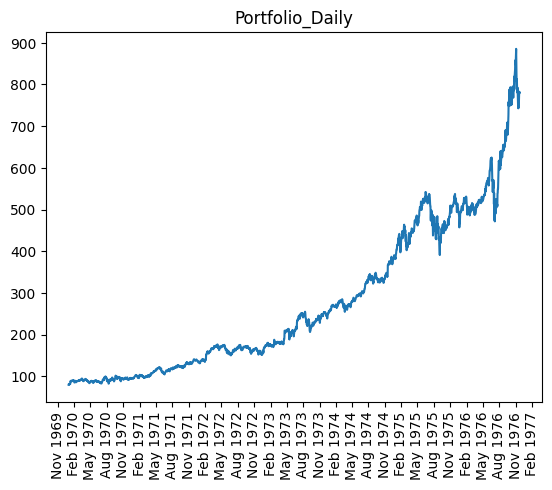

In [145]:
plot_dataframe(stocks)

In [146]:
def plot_boxplot(df):
    for col in  df.columns:
        sns.boxplot(x=df[col],whis=1.5)
        plt.title(col)
        plt.show()

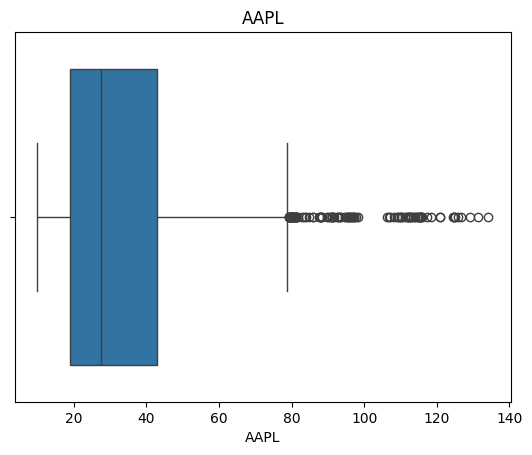

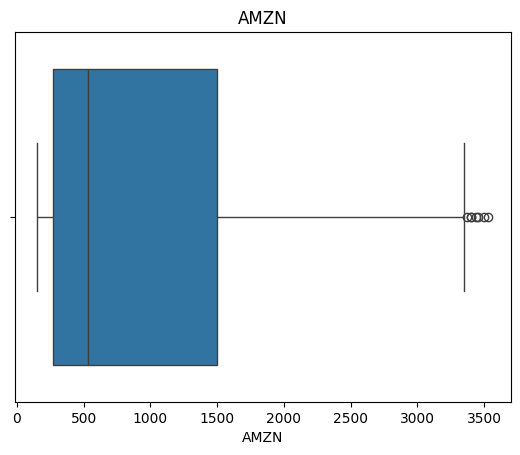

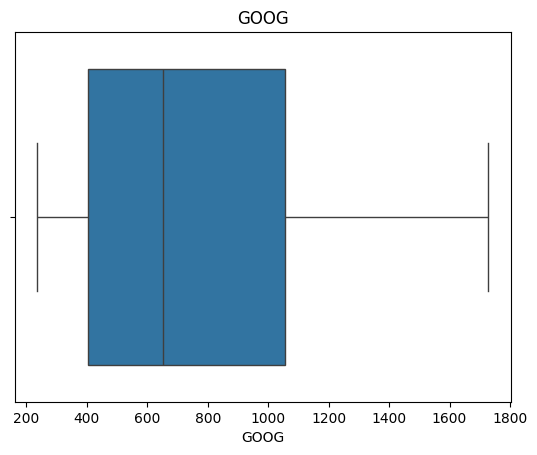

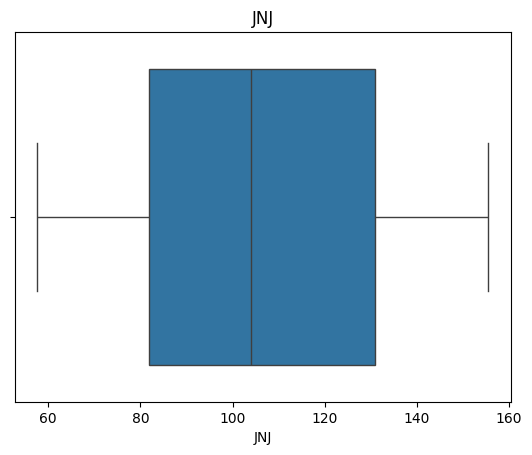

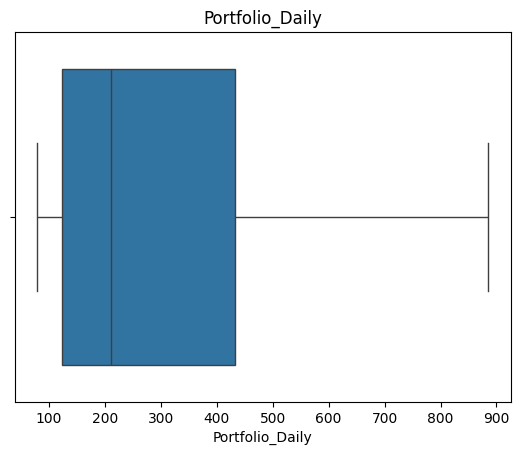

In [147]:
plot_boxplot(stocks)

In [148]:
# No outlier treatment 
# Replacing the outliers with the median value again
for col in stocks.columns:
    Q1 = stocks[col].quantile(0.25)
    Q3 = stocks[col].quantile(0.75)
    IQR = Q3 - Q1
    
    col_median = stocks[col].median()
    
    # IQR
    stocks[col] = np.where(stocks[col] < (Q1 - 1.5 * IQR), col_median, stocks[col])
    stocks[col] = np.where(stocks[col] > (Q3 + 1.5 * IQR), col_median, stocks[col])

In [149]:
kpss_test(stocks)

AAPL
KPSS Statistic: 6.447745
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

AMZN
KPSS Statistic: 7.115730
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

GOOG
KPSS Statistic: 7.892446
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

JNJ
KPSS Statistic: 7.880246
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

Portfolio_Daily
KPSS Statistic: 7.398348
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------



/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range o

In [150]:
def ADFuller_test(df):
    for col in  df.columns:
        result = adfuller(df[col])
        print(col)
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')  # p < 0.05 → stationary
        if result[1] <= 0.05:
            print("\nSeries is Stationary")
        else:
            print("\nSeries is Non-Stationary")
            
        print('\n--------------------------------------\n')

In [151]:
ADFuller_test(stocks)

AAPL
ADF Statistic: -2.2384001997230363
p-value: 0.19260465894113843

Series is Non-Stationary

--------------------------------------

AMZN
ADF Statistic: 1.3342497137492775
p-value: 0.9967939836310623

Series is Non-Stationary

--------------------------------------

GOOG
ADF Statistic: 0.1883782071863705
p-value: 0.9716021780456469

Series is Non-Stationary

--------------------------------------

JNJ
ADF Statistic: -0.9402939195235009
p-value: 0.7744137050642823

Series is Non-Stationary

--------------------------------------

Portfolio_Daily
ADF Statistic: 2.5181998835915858
p-value: 0.9990554852036408

Series is Non-Stationary

--------------------------------------



In [152]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
transformed = pt.fit_transform(stocks)
transformed=pd.DataFrame(transformed, index=stocks.index, columns=stocks.columns)
transformed

,AAPL,AMZN,GOOG,JNJ,Portfolio_Daily
Date,,,,,
01-10-2010,2.159524,3.214343,9.542345,73.438200,3.208288
04-10-2010,2.149430,3.218395,9.525550,73.338267,3.207793
05-10-2010,2.175928,3.231257,9.606323,74.750416,3.222967
06-10-2010,2.176559,3.218419,9.586770,75.263121,3.216606
07-10-2010,2.176635,3.220496,9.564760,75.275631,3.215407
...,...,...,...,...,...
24-09-2020,2.887408,4.062072,14.886999,179.732649,4.182632
25-09-2020,2.887408,4.067253,14.929448,181.026841,4.190372
28-09-2020,2.887408,4.072520,14.978748,182.923205,4.198103


In [153]:
ADFuller_test(transformed)

AAPL
ADF Statistic: -2.0870309840401227
p-value: 0.24976138335513803

Series is Non-Stationary

--------------------------------------

AMZN
ADF Statistic: -0.6801143056896501
p-value: 0.8518333642353244

Series is Non-Stationary

--------------------------------------

GOOG
ADF Statistic: -0.6130176837274937
p-value: 0.8680133498620152

Series is Non-Stationary

--------------------------------------

JNJ
ADF Statistic: -0.9369063053495581
p-value: 0.7755758742240726

Series is Non-Stationary

--------------------------------------

Portfolio_Daily
ADF Statistic: 0.29594211868697057
p-value: 0.9771575453892833

Series is Non-Stationary

--------------------------------------



In [154]:
kpss_test(transformed)

AAPL
KPSS Statistic: 6.935132
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

AMZN
KPSS Statistic: 8.169111
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

GOOG
KPSS Statistic: 8.087182
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

JNJ
KPSS Statistic: 7.883972
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

Portfolio_Daily
KPSS Statistic: 8.181730
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------



/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range o

| Test      | Null Hypothesis (H₀)                      | If p-value < 0.05           |
|-----------|--------------------------------------------|------------------------------|
| **ADF**   | Series has a unit root → **Non-stationary** | Reject H₀ → Likely **stationary** |
| **KPSS**  | Series is stationary                        | Reject H₀ → Likely **non-stationary** |

---

### ⚠️ Why Conflict Happens?

- **ADF** is less sensitive when there's a **deterministic trend**.
- **KPSS** is sensitive to **trend-stationarity**, so it might say stationary when the series is just trend-stationary, not strictly stationary.


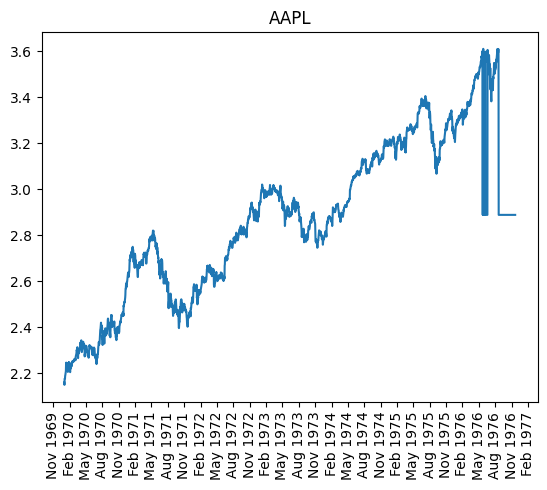

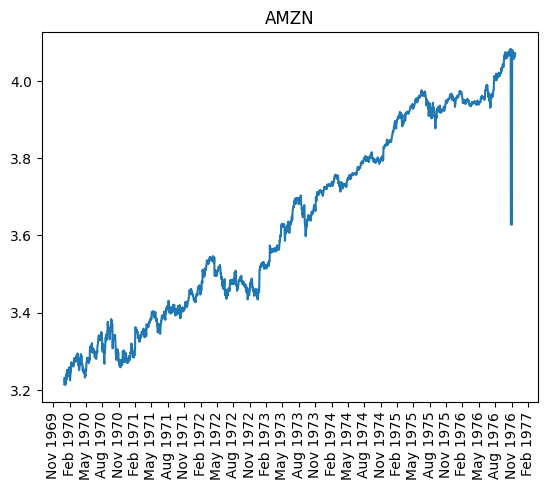

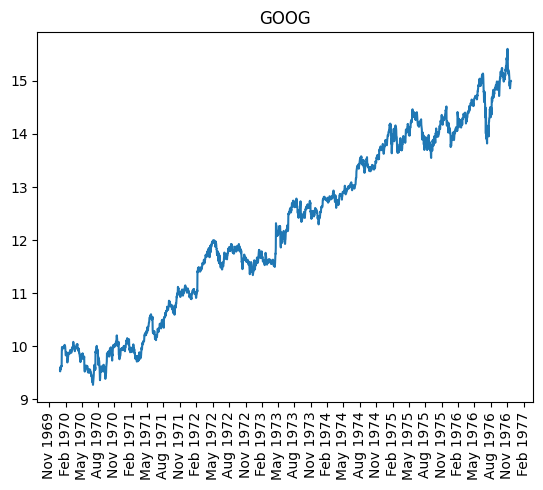

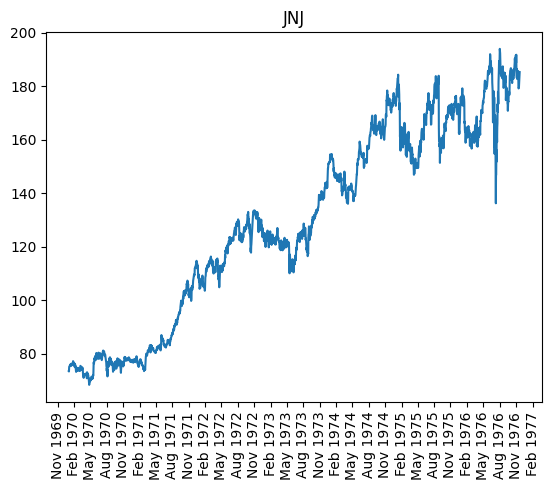

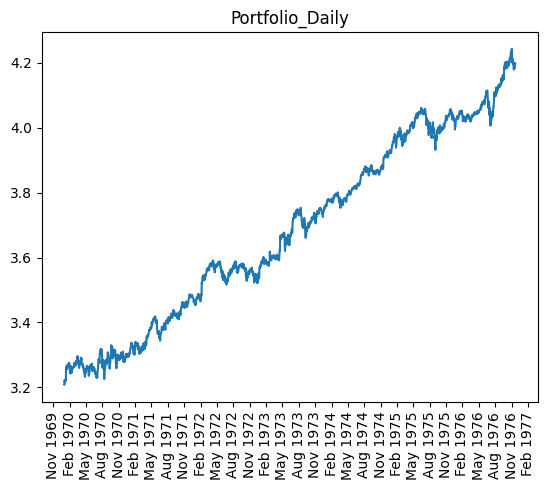

In [156]:
plot_dataframe(transformed)

In [157]:
transformed_diff = transformed.diff().dropna() # Differencing all variables to get rid of Stationarity
transformed_diff.columns=transformed.columns

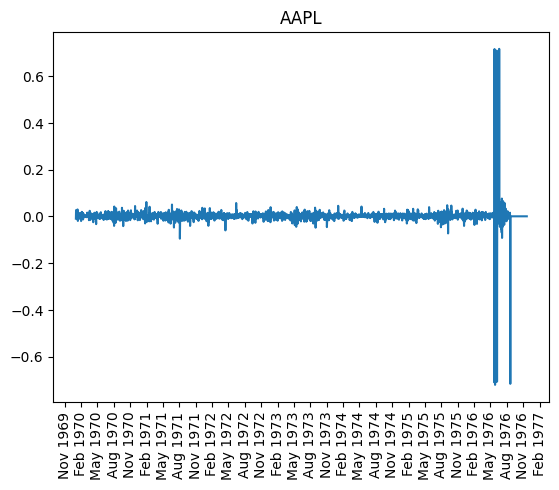

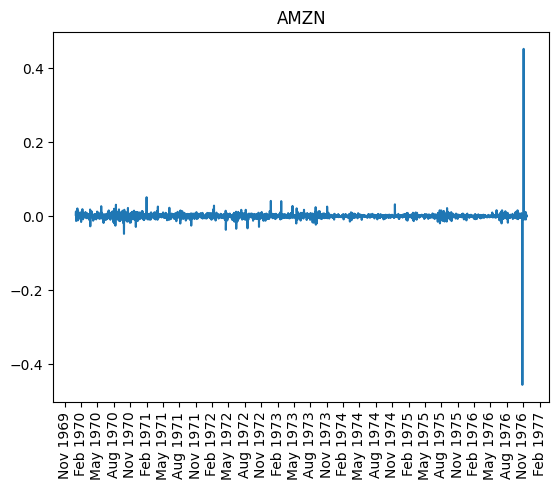

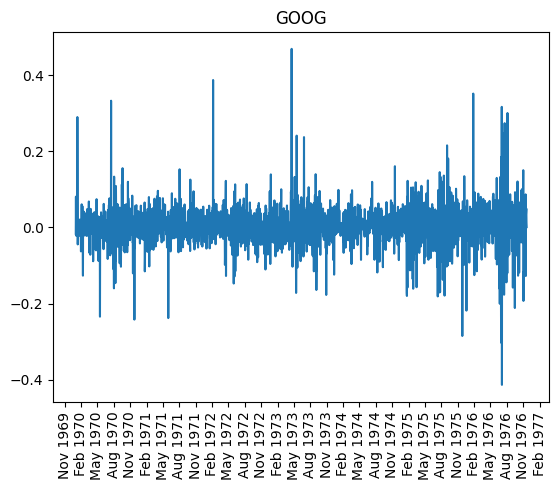

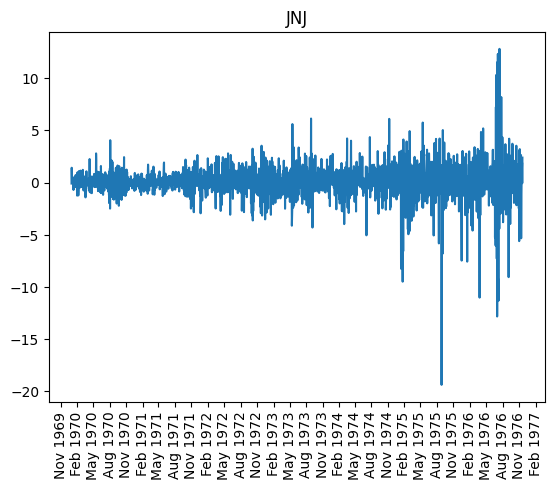

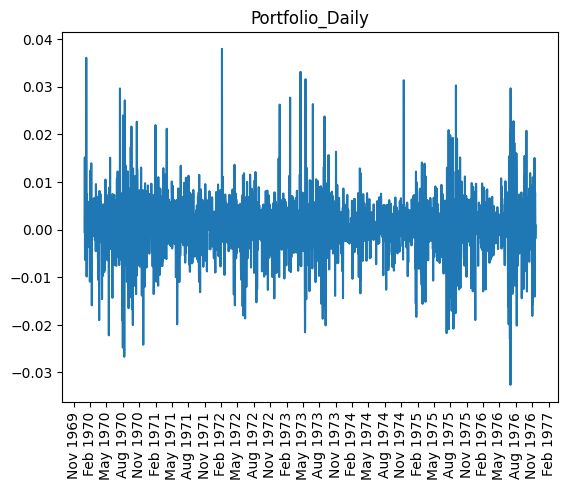

In [158]:
plot_dataframe(transformed_diff)

In [159]:
kpss_test(transformed_diff)

AAPL
KPSS Statistic: 0.098929
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------

AMZN
KPSS Statistic: 0.004558
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------

GOOG
KPSS Statistic: 0.013858
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------

JNJ
KPSS Statistic: 0.015266
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------

Portfolio_Daily
KPSS Statistic: 0.018692
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------



/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range o

In [160]:
ADFuller_test(transformed_diff)

AAPL
ADF Statistic: -12.117187689452612
p-value: 1.8607215403844337e-22

Series is Stationary

--------------------------------------

AMZN
ADF Statistic: -15.32931549077443
p-value: 3.9656356854710166e-28

Series is Stationary

--------------------------------------

GOOG
ADF Statistic: -17.084805525438608
p-value: 7.662540214862876e-30

Series is Stationary

--------------------------------------

JNJ
ADF Statistic: -14.669792442179515
p-value: 3.2805246205716006e-27

Series is Stationary

--------------------------------------

Portfolio_Daily
ADF Statistic: -11.369008444198336
p-value: 9.076307785758912e-21

Series is Stationary

--------------------------------------



In [161]:
transformed_diff_2 = transformed_diff.diff().dropna() # Differencing all variables to get rid of Stationarity

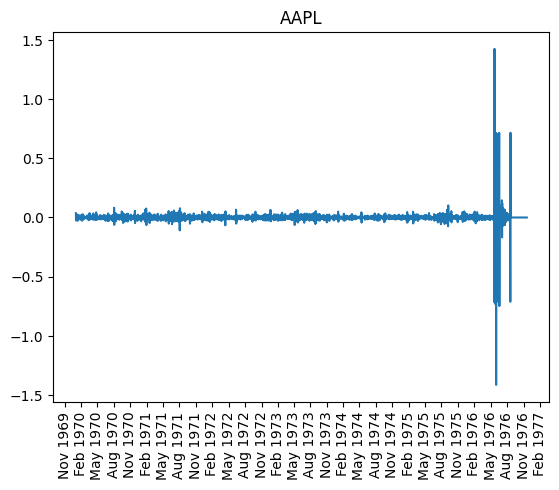

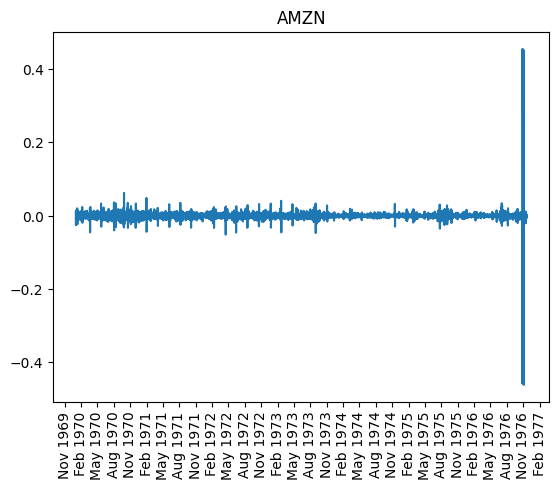

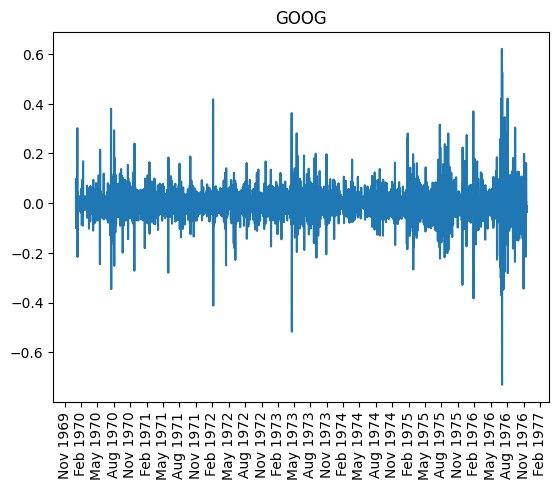

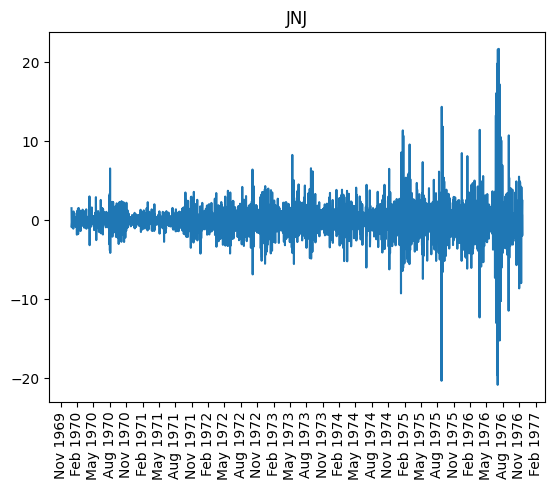

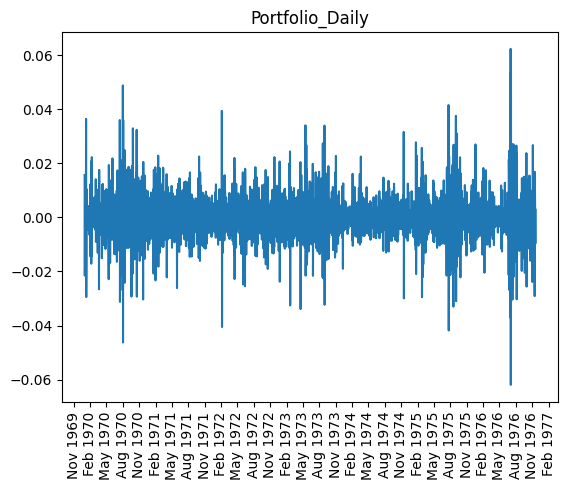

In [162]:
plot_dataframe(transformed_diff_2)

In [163]:
kpss_test(transformed_diff_2)

AAPL
KPSS Statistic: 0.056160
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------

AMZN
KPSS Statistic: 0.075256
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------

GOOG
KPSS Statistic: 0.016329
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------

JNJ
KPSS Statistic: 0.031668
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------

Portfolio_Daily
KPSS Statistic: 0.022769
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------



/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(dataframe[col])
/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/2395262803.py:5: InterpolationWarning: The test statistic is outside of the range o

In [164]:
ADFuller_test(transformed_diff_2)

AAPL
ADF Statistic: -16.25084982258973
p-value: 3.6469150776199204e-29

Series is Stationary

--------------------------------------

AMZN
ADF Statistic: -16.97998646169703
p-value: 9.027296041619996e-30

Series is Stationary

--------------------------------------

GOOG
ADF Statistic: -16.720825132284038
p-value: 1.4090468671591195e-29

Series is Stationary

--------------------------------------

JNJ
ADF Statistic: -15.933179657547871
p-value: 7.688157185526611e-29

Series is Stationary

--------------------------------------

Portfolio_Daily
ADF Statistic: -16.481136066342177
p-value: 2.2366241945741986e-29

Series is Stationary

--------------------------------------



In [165]:
# Keeping 70% values as train
train_len = int(stocks.shape[0]*0.7)
test_len = int(stocks.shape[0]) - int(stocks.shape[0]*0.7)

# Train data
train_data1 = stocks[:train_len] 

# Test data
test_data1 = stocks[train_len:]
train_data1.shape,test_data1.shape

((1761, 5), (756, 5))

In [166]:
train_yeo_johnson = transformed[:train_len]
test_yeo_johnson = transformed[train_len:]

train_transformed_diff = transformed_diff[:train_len-1]
test_transformed_diff = transformed_diff[train_len-1:]
test_transformed_diff.shape,train_transformed_diff.shape,transformed_diff.shape

((756, 5), (1760, 5), (2516, 5))

In [167]:
model1 = VAR(train_transformed_diff)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [168]:
x = model1.select_order(maxlags=50)
x.summary()

,AIC,BIC,FPE,HQIC
0,-40.89*,-40.87*,1.752e-18*,-40.88*
1,-40.88,-40.78,1.765e-18,-40.84
2,-40.87,-40.69,1.785e-18,-40.80
3,-40.88,-40.62,1.764e-18,-40.78
4,-40.86,-40.53,1.790e-18,-40.74
5,-40.86,-40.45,1.795e-18,-40.71
6,-40.85,-40.36,1.816e-18,-40.67
7,-40.84,-40.27,1.835e-18,-40.63
8,-40.83,-40.17,1.860e-18,-40.58
9,-40.81,-40.08,1.885e-18,-40.54


In [169]:
model1=model1.fit()

In [170]:
model1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 18, Apr, 2025
Time:                     20:03:03
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -40.7631
Nobs:                     1759.00    HQIC:                  -40.8219
Log likelihood:           23483.7    FPE:                1.80415e-18
AIC:                     -40.8564    Det(Omega_mle):     1.77369e-18
--------------------------------------------------------------------
Results for equation AAPL
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.000556         0.000273            2.041           0.041
L1.AAPL                    0.053570         0.036897            1.452           0.147
L1.AMZN                    0.198458      

In [171]:
predicted = model1.forecast(train_transformed_diff.values, test_len)
forecast1 = pd.DataFrame(predicted, index = stocks.index[train_len:], columns = stocks.columns)

In [172]:
forecast1

,AAPL,AMZN,GOOG,JNJ,Portfolio_Daily
Date,,,,,
29-09-2017,0.000532,0.000430,0.001641,0.049874,0.000387
02-10-2017,0.000543,0.000325,0.002208,0.048813,0.000371
03-10-2017,0.000551,0.000326,0.002229,0.049253,0.000373
04-10-2017,0.000551,0.000326,0.002230,0.049214,0.000373
05-10-2017,0.000551,0.000326,0.002230,0.049214,0.000373
...,...,...,...,...,...
24-09-2020,0.000551,0.000326,0.002230,0.049214,0.000373
25-09-2020,0.000551,0.000326,0.002230,0.049214,0.000373
28-09-2020,0.000551,0.000326,0.002230,0.049214,0.000373


## reverting modifications of stationarity

In [174]:
# reverting diff()
forecast1=forecast1.cumsum()
forecast1=forecast1.add(transformed.loc['01-10-2010'])
forecast1

,AAPL,AMZN,GOOG,JNJ,Portfolio_Daily
Date,,,,,
29-09-2017,2.160056,3.214773,9.543986,73.488074,3.208675
02-10-2017,2.160599,3.215098,9.546194,73.536888,3.209046
03-10-2017,2.161150,3.215424,9.548423,73.586141,3.209418
04-10-2017,2.161701,3.215750,9.550653,73.635355,3.209791
05-10-2017,2.162252,3.216075,9.552884,73.684570,3.210164
...,...,...,...,...,...
24-09-2020,2.573784,3.459246,11.218967,110.447767,3.488651
25-09-2020,2.574335,3.459572,11.221197,110.496981,3.489023
28-09-2020,2.574886,3.459897,11.223428,110.546196,3.489396


In [175]:
#Undoing yeo-johnson transform
forecast1=pd.DataFrame(pt.inverse_transform(forecast1),index=test_data1.index, columns=test_data1.columns)
forecast1

,AAPL,AMZN,GOOG,JNJ,Portfolio_Daily
Date,,,,,
29-09-2017,10.097358,153.887179,261.988163,61.789925,79.786456
02-10-2017,10.104868,154.021385,262.203034,61.829000,79.844687
03-10-2017,10.112493,154.155958,262.420094,61.868425,79.903290
04-10-2017,10.120127,154.290617,262.637428,61.907818,79.961942
05-10-2017,10.127767,154.425412,262.854910,61.947210,80.020643
...,...,...,...,...,...
24-09-2020,17.820801,309.736310,472.314909,91.053974,141.537796
25-09-2020,17.834371,310.044969,472.666626,91.092568,141.650378
28-09-2020,17.847951,310.353994,473.018557,91.131161,141.763063


# Model Evaluation

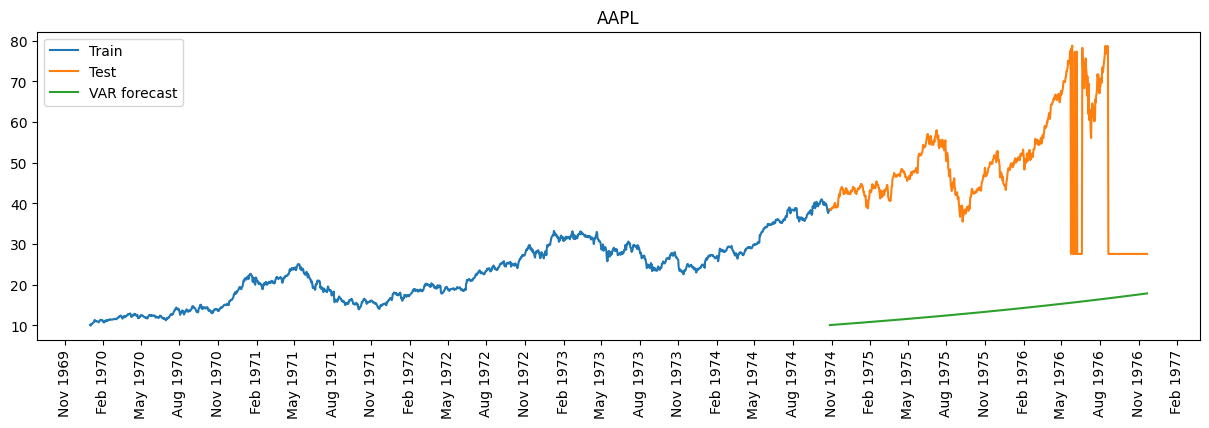

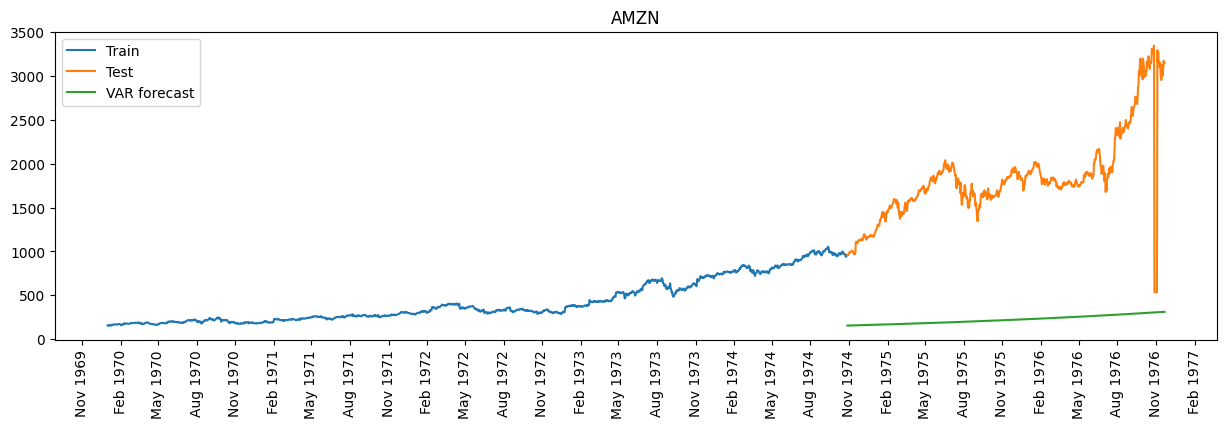

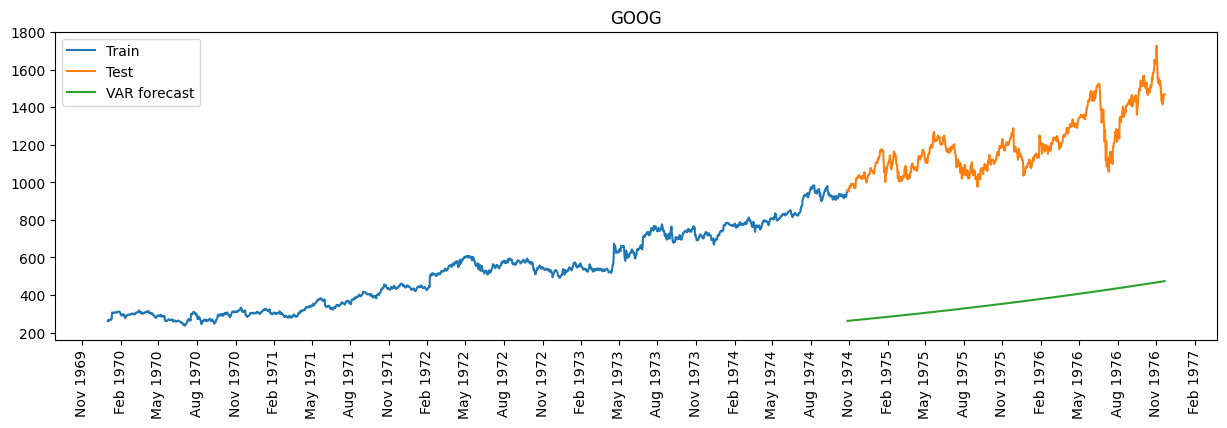

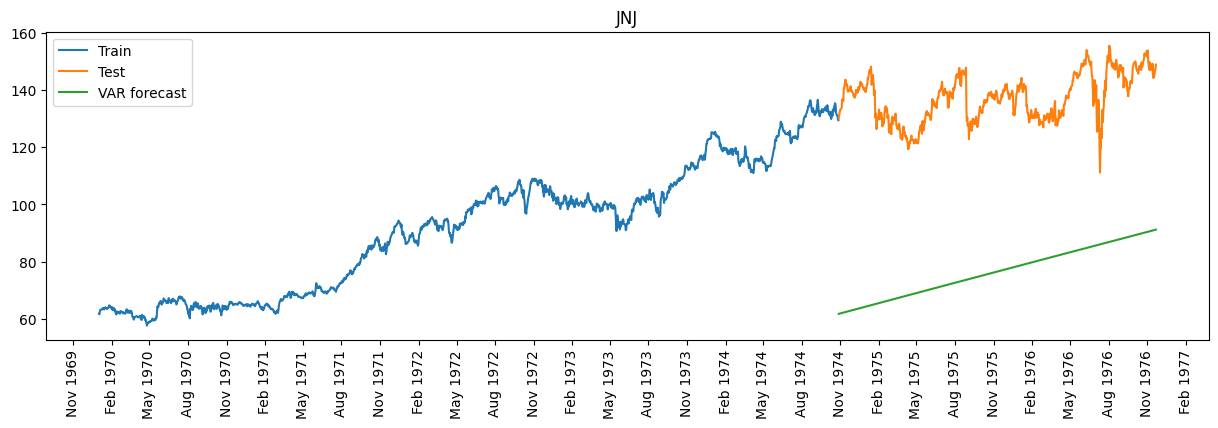

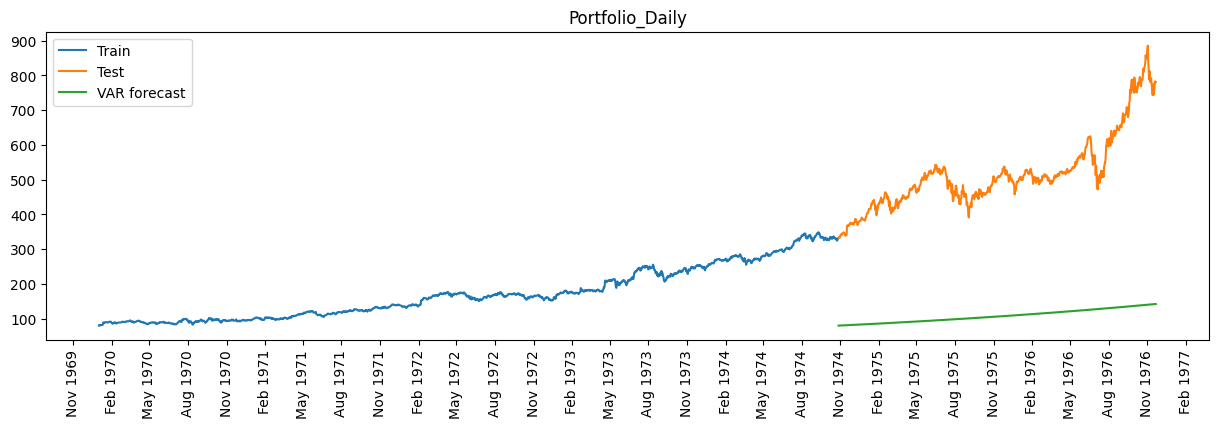

In [177]:
for col in stocks.columns:
     plt.figure(figsize=(15,4))
     plt.plot(stocks[col][:train_len], label='Train')
     plt.plot(stocks[col][train_len:], label='Test')
     plt.plot(forecast1[col][:], label='VAR forecast')
     plt.legend(loc='best')
     plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # every 3 months
     plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
     plt.xticks(rotation=90)
     plt.title(col)
     plt.show()

In [178]:
# Model Evaluation
from sklearn.metrics import mean_squared_error

eval_results = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])
tempResults = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])

for col in stocks.columns:
    rmse = np.sqrt(mean_squared_error(test_data1[col], forecast1[col][:])).round(2)
    mape = np.round(np.mean(np.abs(test_data1[col]-forecast1[col][:])/test_data1[col])*100,2)

    tempResults = pd.DataFrame({'Column':[col], 'RMSE': [rmse],'MAPE': [mape] })
    eval_results = pd.concat([eval_results, tempResults])
    
eval_results

/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/911800759.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eval_results = pd.concat([eval_results, tempResults])


,Column,RMSE,MAPE
0,AAPL,36.450000,68.870000
0,AMZN,"1,679.070000",87.380000
0,GOOG,852.810000,70.220000
0,JNJ,61.290000,44.190000
0,Portfolio_Daily,419.310000,78.980000


## Keeping it simple without any transformation

In [ ]:
# Keeping 70% values as train
train_len = int(stocks.shape[0]*0.7)
test_len = int(stocks.shape[0]) - int(stocks.shape[0]*0.7)

# Train data
train_data1 = stocks[:train_len] 

# Test data
test_data1 = stocks[train_len:]
train_data1.shape,test_data1.shape

In [372]:
model2 = VAR(train_data1).fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [374]:
predicted = model2.forecast(train_data1.values, test_len)
forecast2 = pd.DataFrame(predicted, index = stocks.index[train_len:], columns = stocks.columns)

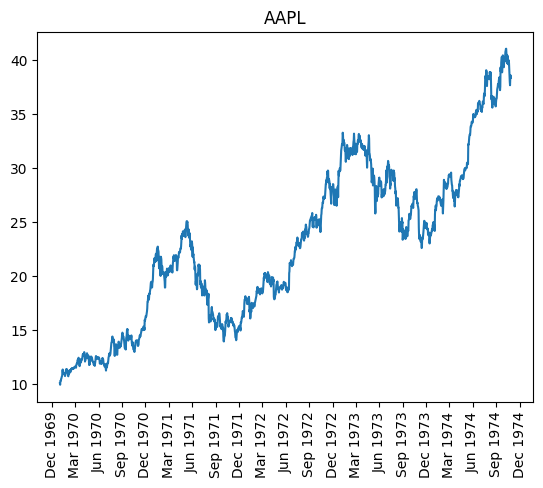

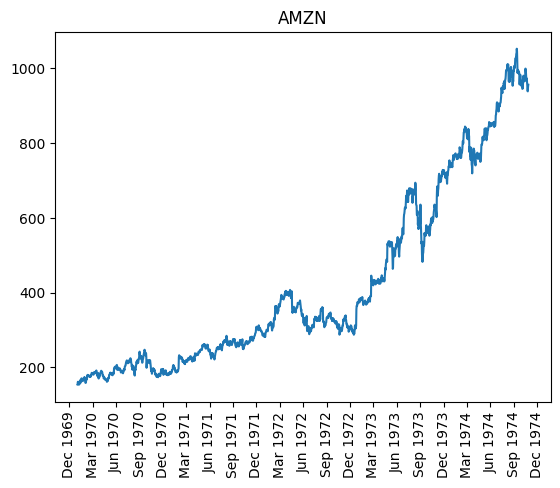

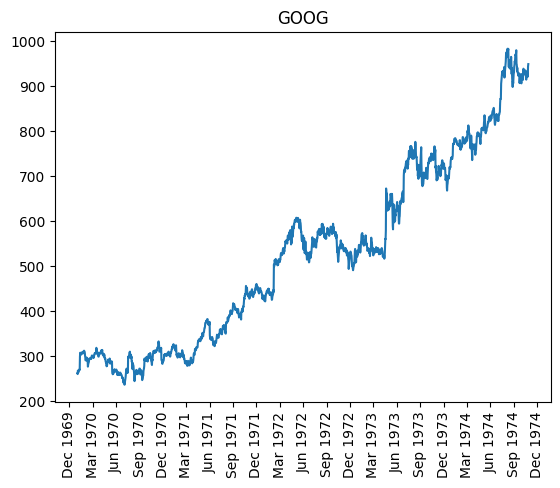

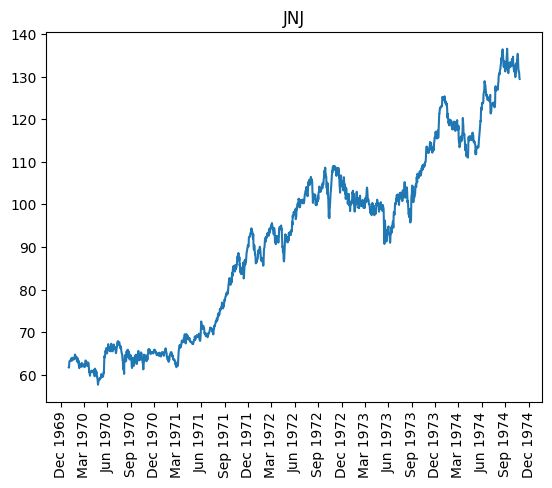

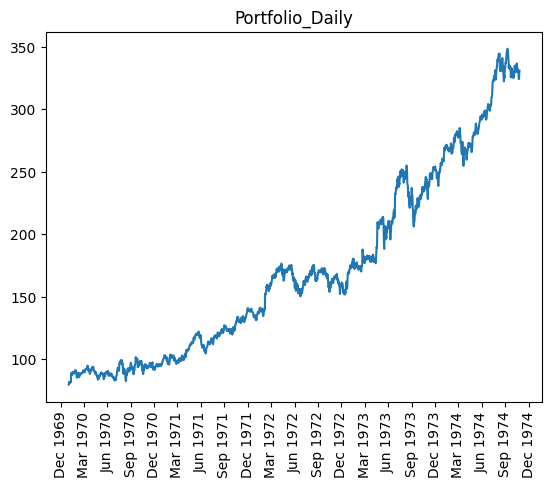

In [376]:
plot_dataframe(train_data1)

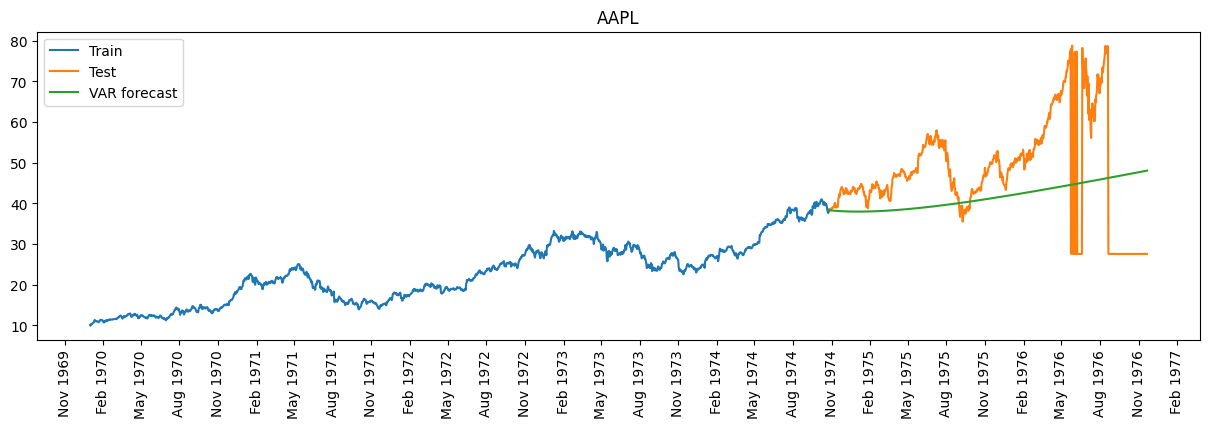

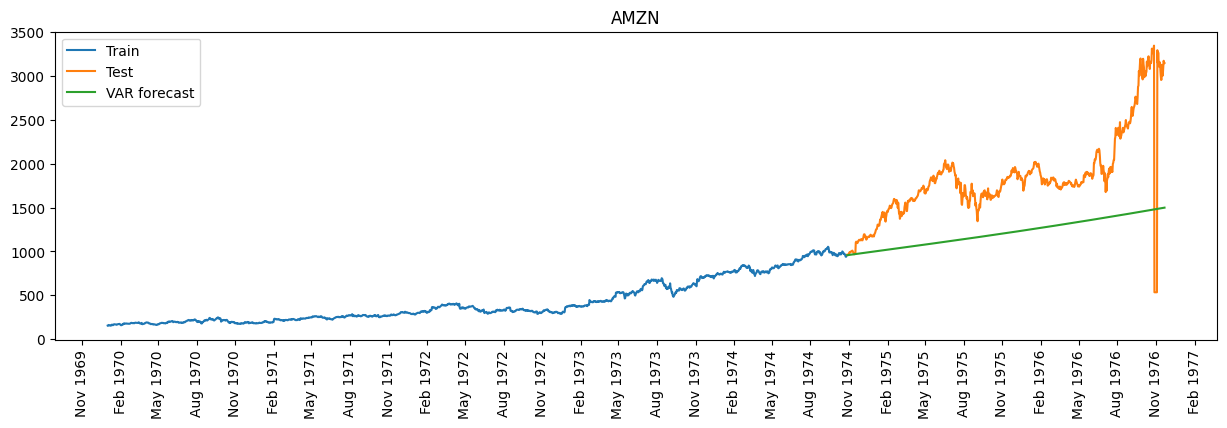

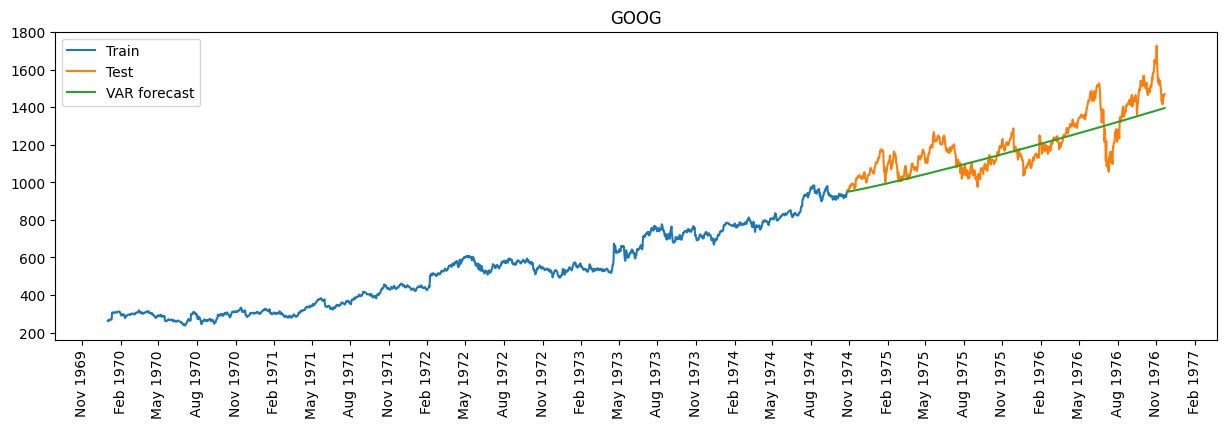

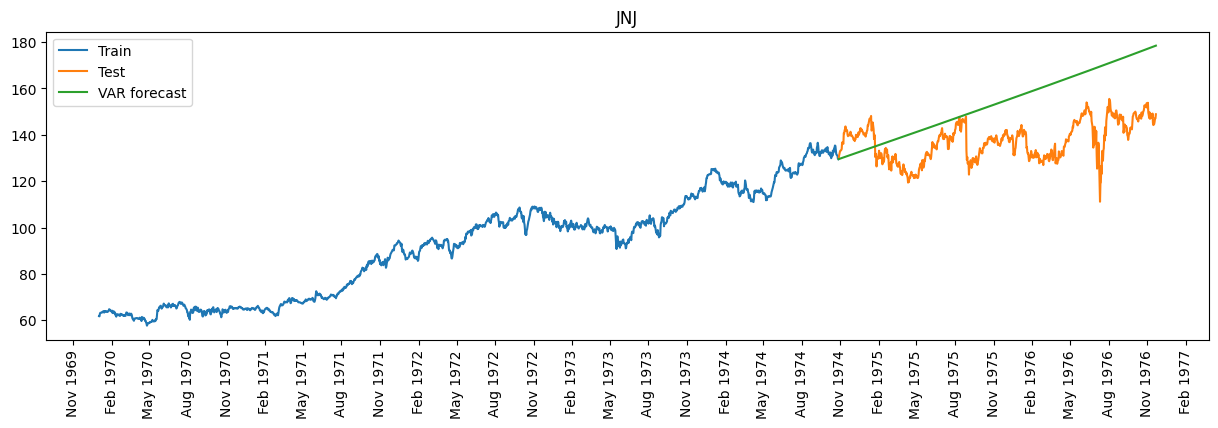

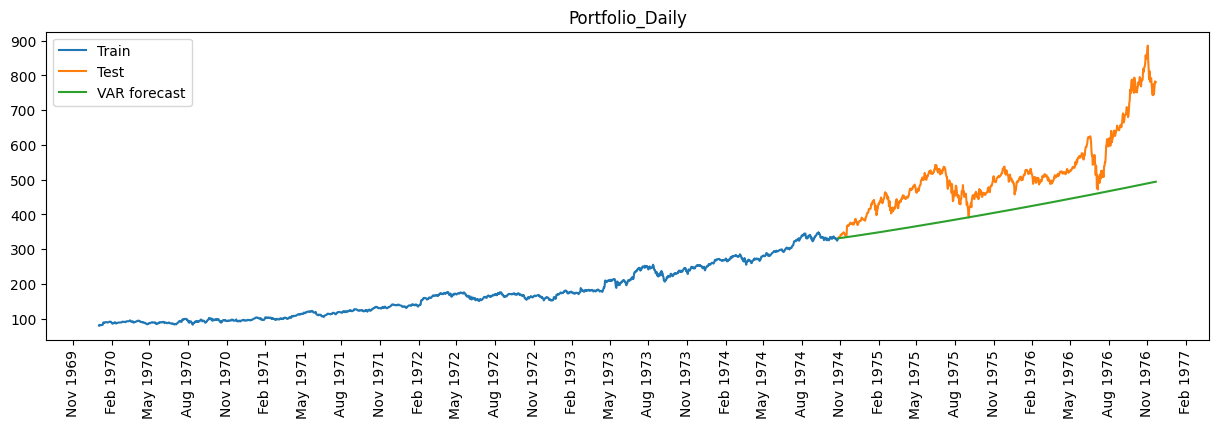

In [377]:
for col in stocks.columns:
     plt.figure(figsize=(15,4))
     plt.plot(stocks[col][:train_len], label='Train')
     plt.plot(stocks[col][train_len:], label='Test')
     plt.plot(forecast2[col][:], label='VAR forecast')
     plt.legend(loc='best')
     plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # every 3 months
     plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
     plt.xticks(rotation=90)
     plt.title(col)
     plt.show()

In [380]:
# Model Evaluation
from sklearn.metrics import mean_squared_error

eval_results = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])
tempResults = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])

for col in stocks.columns:
    rmse = np.sqrt(mean_squared_error(test_data1[col], forecast2[col][:])).round(2)
    mape = np.round(np.mean(np.abs(test_data1[col]-forecast2[col][:])/test_data1[col])*100,2)

    tempResults = pd.DataFrame({'Column':[col], 'RMSE': [rmse],'MAPE': [mape] })
    eval_results = pd.concat([eval_results, tempResults])
    
eval_results

/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_32280/1667357031.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eval_results = pd.concat([eval_results, tempResults])


,Column,RMSE,MAPE
0,AAPL,14.360000,26.370000
0,AMZN,735.200000,33.270000
0,GOOG,99.970000,6.540000
0,JNJ,20.720000,13.400000
0,Portfolio_Daily,129.960000,19.540000


In [386]:
stocks.columns

Index(['AAPL', 'AMZN', 'GOOG', 'JNJ', 'Portfolio_Daily'], dtype='object')

In [384]:
initial_weight

array([0.5 , 0.15, 0.15, 0.2 ])

In [388]:
portfolio_risk

0.2227749934241994

In [398]:
returns.Portfolio_Daily_Return.mean()*252

0.3256087337847352

In [400]:
Annualised_Sharpe_Ratio

1.2130196364413752